# **Proyek Analisis Data: E-Commerce Dataset**
- Nama: Muhammad Sya'bani Falif
- Email: msfalif404@gmail.com
- Id Dicoding: https://www.dicoding.com/users/msfalif404/academies

## **Menentukan Pertanyaan Bisnis**

- Metode Pembayaran Apa Yang Paling Banyak Digunakan ?
- Produk Dengan Kategori Apa Yang Paling Banyak Terjual ? Apakah Penjualannya Stabil ?
- Produk Apa Yang Paling Banyak Terjual ?
- Kategori Produk Apa Yang Paling Banyak Menghasilkan Keuntungan ?
- Bagaimana Grafik Penjualan E-Commerce Tersebut ? Apakah Penjualannya Stabil ?
- Bagaimana Distribusi Rating Penjualan ? Apakah Banyak Produk Yang Memiliki Rating Rendah ?
- Bagaimana Perbandingan Estimasi Waktu Pengiriman Dengan Waktu Pengiriman Sebenarnya ? Apakah Waktu Pengiriman Produk Lebih Lama Daripada Estimasinya ?
- Apa penyebab Pengiriman Produk Datang Terlambat ?
- Bagaimana Demografi Pelanggan dan Penjual ?
- Pada Waktu Apa Penjualan Paling Banyak Terjadi (Hari/Jam) ?
- Bagaimana Segmentasi Pelanggan Berdasarkan RFM ?

## **Menyiapkan semua library yang dibuthkan**

In [ ]:
!pip3 install basemap

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.basemap import Basemap

from wordcloud import WordCloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 860.7/860.7 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 7.9 MB/s eta 0:00:00


## **Data Wrangling**

### **Gathering Data**

**Customer Dataframe**

In [ ]:
customers_df = pd.read_csv('customers_dataset.csv')
customers_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


**Geolocation Dataframe**

In [ ]:
geolocation_df = pd.read_csv('geolocation_dataset.csv')
geolocation_df

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
613282,36205,-21.225473,-43.764591,barbacena,MG
613283,36213,-21.104094,-44.026492,dores de campos,MG
613284,36200,-21.230785,-43.770078,barbacena,MG
613285,36213,-21.110972,-44.025269,dores de campos,MG


**Order Item Dataframe**

In [ ]:
order_items_df = pd.read_csv('order_items_dataset.csv')
order_items_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


**Order Payment Dataframe**

In [ ]:
order_payments_df = pd.read_csv('order_payments_dataset.csv')
order_payments_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


**Order Reviews Dataframe**

In [ ]:
orders_review_df = pd.read_csv('order_reviews_dataset.csv')
orders_review_df

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


**Order Dataframe**

In [ ]:
orders_df = pd.read_csv('orders_dataset.csv')
orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


**Product Category Name Translation Dataframe**

In [ ]:
product_category_df = pd.read_csv('product_category_name_translation.csv')
product_category_df

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


**Product Dataframe**

In [ ]:
products_df = pd.read_csv('products_dataset.csv')
products_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


**Sellers Dataframe**

In [ ]:
sellers_df = pd.read_csv('sellers_dataset.csv')
sellers_df

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


### **Assessing Data**

**Mengecek Dataframe Customer**

**Data Clean:** Berdasarkan kode dibawah ini, dapat diketahui dataframe customers sudah bersih (tidak ada feature yang tipe datanya salah, tidak ada null/missing value, tidak ada data yang duplikat dan tidak ada data yang tidak tepat)

In [ ]:
customers_df.info()

customers_df.describe()

customers_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

**Mengecek Dataframe Geolocation**

**Duplicate Data:** Berdasarkan kode dibawah ini dapat diketahui terdapat 261831 baris data yang duplikat. Data-data ini tidak akan dihapus karena dikhawatirka akan menghilangkan informasi yang bermanfaat.

**Data Clean:** Sisanya, dataframe geolocation sudah bersih (tidak ada feature yang tipe datanya salah, tidak ada null/missing value)

In [ ]:
geolocation_df.info()

geolocation_df.describe()

print(f"Terdapat {geolocation_df.duplicated().sum()} data yang duplikat pada data frame geolocation")

geolocation_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613287 entries, 0 to 613286
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  613287 non-null  int64  
 1   geolocation_lat              613287 non-null  float64
 2   geolocation_lng              613287 non-null  float64
 3   geolocation_city             613286 non-null  object 
 4   geolocation_state            613286 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 23.4+ MB
Terdapat 180665 data yang duplikat pada data frame geolocation


geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               1
geolocation_state              1
dtype: int64

**Mengecek Dataframe Order Items**

**Inaccurute Data Type:** Berdasarkan kode dibawah ini, dapat diketahui terdapat kolom yang kurang tepat tipe datanya, yaitu shipping_limit_date. Oleh karena itu, tipe data kolom shipping_limit_date harus diganti yang semulanya object menjadi date.

**Data Clean:** Sisanya, dataframe order items sudah bersih (tidak ada null/missing value, tidak ada data yang duplikat dan tidak ada data yang tidak tepat)

In [ ]:
order_items_df.info()

order_items_df.describe()

print(f"Terdapat {order_items_df.duplicated().sum()} data yang duplikat pada data frame order items")

order_items_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
Terdapat 0 data yang duplikat pada data frame order items


order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

**Mengecek Dataframe Order Payment**

Inaccurate Value: Berdasarkan kode dibawah ini, dapat diketahui bahwa terdapat data yang tidak akurat pada kolom payment type. Terdapa nilai not defined, baris data yang memiliki metode pembayaran ini akan dihapus karena hanya sedikit baris data yang nilai dari metode pembayarannya not defined, yaitu sebanyak 3 baris data.

**Data Clean:** Berdasarkan kode dibawah ini, dapat diketahui dataframe order payment sudah bersih (tidak ada feature yang tipe datanya salah, tidak ada null/missing value dan tidak ada data yang duplikat)

In [ ]:
order_payments_df.info()

order_payments_df.describe()

print(f"Terdapat {order_payments_df.duplicated().sum()} data yang duplikat pada data frame order payments")

order_payments_df.isna().sum()

order_payments_df["payment_type"].unique().tolist()

not_defined_payment = order_payments_df.groupby(by = "payment_type")["order_id"].nunique().sort_values()["not_defined"]
print(f"Terdapat {not_defined_payment} baris data yang memiliki metode pembayaran not defined")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
Terdapat 0 data yang duplikat pada data frame order payments
Terdapat 3 baris data yang memiliki metode pembayaran not defined


**Mengecek Dataframe Order Reviews**

**Inaccurate Data Type:** Berdasarkan kode dibawah ini, dapat diketahui terdapat kolom yang kurang tepat tipe datanya, yaitu review_creation_date dan review_answer_timestamp. Oleh karena itu, tipe data kedua kolom tersebut harus diganti yang semulanya object menjadi date.

**Missing Values:** Selain itu, terdapat banyak baris yang tidak memiliki data (null value) terutama pada kolom review_comment_title dan review_comment_message. Akan tetapi, baris yang memiliki null value ini tidak akan dihapus, karena akan mengakibatkan kehilangan sejumlah informasi yang cukup banyak. Terlebih lagi, hal ini terjadi karena customers hanya menilai pesanan dengan cara memberikan skor kepada pesanan tersebut dan banyak yang tidak mengisi pendapat mereka terhadap pesanan yang telah dibeli dan asumsi pada aplikasi penjualan tidak mewajibkan penggunannya untuk memberikan komentar

**Clean Data:** Sisanya, dataframe order reviews sudah bersih (tidak ada data yang duplikat dan tidak ada data yang tidak tepat)

In [ ]:
orders_review_df.info()

orders_review_df.describe()

print(f"Terdapat {orders_review_df.duplicated().sum()} data yang duplikat pada data frame order reviews")

order_payments_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
Terdapat 0 data yang duplikat pada data frame order reviews


order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

**Mengecek Dataframe Order**

**Inaccurate Data Type:** Berdasarkan kode dibawah ini, dapat diketahui terdapat kolom yang kurang tepat tipe datanya, yaitu order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_early_datae. Oleh karena itu, tipe data kolom-kolom tersebut harus diganti yang semulanya object menjadi date.

**Missing Values & Inaccurate Data:** Selain itu, terdapat baris yang memiliki data yang hilang atau bisa dikatakan tidak tepat, karena setelah diobservasi terdapat baris data anomali karena barang sudah terkirim akan tetapi pemesanannya belum dikonfirmasi (Mungkin karena kesalahan sistem aplikasinya). Lalu, banyak juga data yang null dikarenakan status pemesanan sudah dibatalkan atau memiliki status lainnya seperti masih diproses, masih dalam perjalanan dan lain sebagainya. Data seperti ini akan dihapus, karena jumlahnya hanya sedikit.

**Data Clean:** Sisanya, dataframe orders sudah bersih (tidak ada data yang duplikati, semua tipe data features sudah benar)

In [ ]:
orders_df.info()

orders_df.describe()

print(f"Terdapat {orders_df.duplicated().sum()} data yang duplikat pada data frame order")

orders_df.isna().sum()

orders_df[(orders_df['order_delivered_carrier_date'].notnull()) & (orders_df['order_approved_at'].isna())]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
Terdapat 0 data yang duplikat pada data frame order


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaN,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17 00:00:00
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaN,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21 00:00:00
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaN,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17 00:00:00
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaN,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31 00:00:00
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaN,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20 00:00:00
26800,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,NaN,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01 00:00:00
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,NaN,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27 00:00:00
39334,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,NaN,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22 00:00:00
48401,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,delivered,2017-01-19 22:26:59,NaN,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16 00:00:00
61743,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,NaN,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20 00:00:00


**Mengecek Dataframe Product Category**

**Data Clean:** Berdasarkan kode dibawah ini, dapat diketahui dataframe product category sudah bersih (tidak ada feature yang tipe datanya salah, tidak ada null/missing value, tidak ada data yang duplikat dan tidak ada data yang tidak tepat)

In [ ]:
product_category_df.info()

print(f"Terdapat {product_category_df.duplicated().sum()} data yang duplikat pada data frame product category")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
Terdapat 0 data yang duplikat pada data frame product category


**Mengecek Dataframe Product**

**Missing Values:** Berdasarkan kode dibawah ini, dapat diketahui terdapat 610 missing value pada kolom product_category_name, product_name_length, product_description_length, product_photos_qty. Sedangkan, terdapat 2 missing value pada kolom product_weigth_g, product_length_cm, product_width_cm, dan product_height_cm. Data-data ini akan tidak akan dihapus karena khawatir kehilangan informasi yang bermanfaat. Oleh karena itu kolom-kolom yang memiliki missing value akan digantikan nilainya menjadi N/A, 0, ataupun nilai rata-rata dari kolom tersebut.

**Data Clean:** Berdasarkan kode dibawah ini, dapat diketahui dataframe order payment sudah bersih (tidak ada feature yang tipe datanya salah, tidak ada data yang duplikat dan tidak ada data yang tidak tepat)

In [ ]:
products_df.info()

products_df.describe()

products_df.isnull().sum()

print(f"Terdapat {products_df.duplicated().sum()} data yang duplikat pada data frame products")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
Terdapat 0 data yang duplikat pada data frame products


**Mengecek Dataframe Seller**


**Data Clean:** Berdasarkan kode dibawah ini, dapat diketahui dataframe seller sudah bersih (tidak ada feature yang tipe datanya salah, tidak ada null/missing value, tidak ada data yang duplikat dan tidak ada data yang tidak tepat)

In [ ]:
sellers_df.info()

sellers_df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


0

### **Cleaning Data**

**Menghapus Data tidak Akurat Pada Dataframe Order Payments**

In [ ]:
order_payments_df.drop(order_payments_df[order_payments_df["payment_type"] == "not_defined"].index, inplace = True)
order_payments_df.groupby(by = "payment_type")["order_id"].nunique().sort_values()

payment_type
debit_card      1528
voucher         3866
boleto         19784
credit_card    76505
Name: order_id, dtype: int64

**Mengganti Tipe Data Dataframe Order Items**

In [ ]:
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])

**Mengganti Tipe Data Dataframe Orders Review**

In [ ]:
orders_review_df["review_creation_date"] = pd.to_datetime(orders_review_df["review_creation_date"])
orders_review_df["review_answer_timestamp"] = pd.to_datetime(orders_review_df["review_answer_timestamp"])

**Mengganti Tipe Data Dataframe Orders**

In [ ]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

**Menghapus Data Anomali Pada Dataframe Orders**

In [ ]:
#menghapus order yang sudah dikirim ke pihak logistik/sampai tetapi status pemesanannya belum dikonfirmasi
anomaly_data = orders_df[(orders_df['order_delivered_carrier_date'].notnull()) & (orders_df['order_approved_at'].isna())]
orders_df.drop(anomaly_data.index, inplace = True)

**Mengisi Missing Value Pada Dataframe Products**

**Missing Values:** Berdasarkan kode dibawah ini, dapat diketahui terdapat 610 missing value pada kolom product_category_name, product_name_length, product_description_length, product_photos_qty. Sedangkan, terdapat 2 missing value pada kolom product_weigth_g, product_length_cm, product_width_cm, dan product_height_cm. Data-data ini akan tidak akan dihapus karena khawatir kehilangan informasi yang bermanfaat. Oleh karena itu kolom-kolom yang memiliki missing value akan digantikan nilainya menjadi N/A, 0, ataupun nilai rata-rata dari kolom tersebut.

In [ ]:
products_df["product_category_name"].fillna("N/A", inplace=True)
products_df["product_name_lenght"].fillna(0, inplace = True)
products_df["product_description_lenght"].fillna(0, inplace = True)
products_df["product_photos_qty"].fillna(0, inplace = True)

products_df["product_weight_g"].fillna(products_df["product_weight_g"].mean(), inplace=True)
products_df["product_length_cm"].fillna(products_df["product_length_cm"].mean(), inplace=True)
products_df["product_width_cm"].fillna(products_df["product_width_cm"].mean(), inplace=True)
products_df["product_height_cm"].fillna(products_df["product_height_cm"].mean(), inplace=True)

### **Menyatukan Dataframe**

**Menggabungkan Dataframe Product Category ke Dataframe Product**

In [ ]:
products_df = products_df.merge(product_category_df, left_on="product_category_name", right_on="product_category_name", how="inner")
products_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery
2,0d009643171aee696f4733340bc2fdd0,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,perfumaria,49.0,460.0,2.0,267.0,17.0,13.0,17.0,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,perfumaria,56.0,733.0,3.0,377.0,18.0,13.0,15.0,perfumery
...,...,...,...,...,...,...,...,...,...,...
32323,13b25797ad1e6d6c7cd3cbeb35f8ee7a,moveis_colchao_e_estofado,44.0,348.0,1.0,18250.0,25.0,25.0,25.0,furniture_mattress_and_upholstery
32324,dc36a7859b743d8610a2bbbaea26ece9,moveis_colchao_e_estofado,29.0,2073.0,2.0,2500.0,41.0,21.0,21.0,furniture_mattress_and_upholstery
32325,107fde0930956120d1e13dd1062fbb46,moveis_colchao_e_estofado,51.0,418.0,1.0,30000.0,60.0,73.0,60.0,furniture_mattress_and_upholstery
32326,726b4e18f00255e2e63491bcba3f60b8,moveis_colchao_e_estofado,41.0,866.0,1.0,1700.0,70.0,10.0,100.0,furniture_mattress_and_upholstery


**Menyatukan Order Item Dengan Seller**

In [ ]:
order_item_seller_df = pd.merge(
    left = order_items_df,
    right = sellers_df,
    how = "inner",
    on = "seller_id"
)
order_item_seller_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,0188777fe321843a18be24a6e9aa1e53,1,436c8d57ff8d4aa254318e9bd9b48c83,48436dade18ac8b2bce089ec2a041202,2017-07-31 14:35:11,55.90,9.94,27277,volta redonda,SP
2,0191bbb5166d4b9a68df11797d5acfa9,1,ec02a5d380128f7a188e9ce8f3ddd832,48436dade18ac8b2bce089ec2a041202,2017-08-16 12:30:15,132.90,20.17,27277,volta redonda,SP
3,03054d8a8eefc2981cfad06f58e27979,1,3e31fd1419cc4cd6adad1925e72e3a03,48436dade18ac8b2bce089ec2a041202,2017-10-09 10:35:11,58.90,15.16,27277,volta redonda,SP
4,0c325ea6925de749e1420be0cf43587c,1,3a135477bf41350a0b1d8afdf616d446,48436dade18ac8b2bce089ec2a041202,2017-07-06 15:43:50,139.90,16.74,27277,volta redonda,SP
...,...,...,...,...,...,...,...,...,...,...
112645,fdfeec75aa07c1d2a88b17b8fbfc7b8f,1,11059273f4bc1a293777e98c89807c62,dbc51f5e45d654ecc16cb68e6817ecea,2017-03-01 22:42:22,199.99,18.14,14402,franca,SP
112646,fe68b52db13993f58175fa589125d345,1,f4135cbdece8245560f7be179533797a,3fefda3299e6dfaea3466ef346a3571a,2017-08-17 02:55:27,209.00,16.21,82620,curitiba,PR
112647,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21,86026,londrina,PR
112648,ff701a7c869ad21de22a6994237c8a00,1,5ff4076c0f01eeba4f728c9e3fa2653c,3e35a8bb43569389d3cebef0ce820f69,2018-04-18 20:10:33,27.90,14.44,3124,sao paulo,SP


**Menyatukan Order Item Seller Dengan Product**

In [ ]:
order_item_seller_product_df = pd.merge(
    left = order_item_seller_df,
    right = products_df,
    how = "inner",
    on = "product_id"
)
order_item_seller_product_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,27277,volta redonda,SP,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,27277,volta redonda,SP,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,27277,volta redonda,SP,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,27277,volta redonda,SP,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,27277,volta redonda,SP,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111018,fdaf98feac227eb978d8f33f36e0231d,1,f739e9151702508b18f796c53005e5e9,d1aa1ec0839dcab73a6161130eb1f94a,2017-04-27 05:10:28,119.9,16.14,80220,curitiba,PR,moveis_decoracao,44.0,533.0,2.0,1000.0,69.0,11.0,11.0,furniture_decor
111019,fe68b52db13993f58175fa589125d345,1,f4135cbdece8245560f7be179533797a,3fefda3299e6dfaea3466ef346a3571a,2017-08-17 02:55:27,209.0,16.21,82620,curitiba,PR,eletronicos,32.0,1306.0,3.0,500.0,17.0,9.0,25.0,electronics
111020,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.0,193.21,86026,londrina,PR,pcs,50.0,1935.0,4.0,5660.0,54.0,18.0,47.0,computers
111021,ff701a7c869ad21de22a6994237c8a00,1,5ff4076c0f01eeba4f728c9e3fa2653c,3e35a8bb43569389d3cebef0ce820f69,2018-04-18 20:10:33,27.9,14.44,3124,sao paulo,SP,bebidas,28.0,242.0,1.0,2000.0,19.0,38.0,19.0,drinks


**Menyatukan Order Dengan Customer**

In [ ]:
order_customer_df = pd.merge(
    left = orders_df,
    right = customers_df,
    how = "left",
    on = "customer_id"
)
order_customer_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...
99422,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
99423,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
99424,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
99425,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


**Menyatukan Order Customer Dengan Order Review**

In [ ]:
order_customer_review_df = pd.merge(
    left = order_customer_df,
    right = orders_review_df,
    how = "left",
    on = "order_id"
)
order_customer_review_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,359d03e676b3c069f62cadba8dd3f6e8,5.0,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,e50934924e227544ba8246aeb3770dd4,5.0,NaN,NaN,2018-02-17,2018-02-18 13:02:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99973,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,e262b3f92d1ce917aa412a9406cf61a6,5.0,NaN,NaN,2017-03-22,2017-03-23 11:02:08
99974,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,29bb71b2760d0f876dfa178a76bc4734,4.0,NaN,So uma peça que veio rachado mas tudo bem rs,2018-03-01,2018-03-02 17:50:01
99975,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,371579771219f6db2d830d50805977bb,5.0,NaN,Foi entregue antes do prazo.,2017-09-22,2017-09-22 23:10:57
99976,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,8ab6855b9fe9b812cd03a480a25058a1,2.0,NaN,Foi entregue somente 1. Quero saber do outro p...,2018-01-26,2018-01-27 09:16:56


**Menyatukan Order Customer Review Dengan Order Payment**

In [ ]:
order_customer_review_payment_df = pd.merge(
    left = order_customer_review_df,
    right = order_payments_df,
    how = "left",
    on = "order_id"
)
order_customer_review_payment_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18,2018-08-22 19:07:58,1.0,credit_card,3.0,179.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104459,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,6359f309b166b0196dbf7ad2ac62bb5a,12209,...,e262b3f92d1ce917aa412a9406cf61a6,5.0,NaN,NaN,2017-03-22,2017-03-23 11:02:08,1.0,credit_card,3.0,85.08
104460,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,...,29bb71b2760d0f876dfa178a76bc4734,4.0,NaN,So uma peça que veio rachado mas tudo bem rs,2018-03-01,2018-03-02 17:50:01,1.0,credit_card,3.0,195.00
104461,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,...,371579771219f6db2d830d50805977bb,5.0,NaN,Foi entregue antes do prazo.,2017-09-22,2017-09-22 23:10:57,1.0,credit_card,5.0,271.01
104462,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,...,8ab6855b9fe9b812cd03a480a25058a1,2.0,NaN,Foi entregue somente 1. Quero saber do outro p...,2018-01-26,2018-01-27 09:16:56,1.0,credit_card,4.0,441.16


**Menyatukan Semua Dataframe**

In [ ]:
all_df = pd.merge(
    left = order_customer_review_payment_df,
    right = order_item_seller_product_df,
    how = "left",
    on = "order_id"
)
all_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,SP,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,SP,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118893,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,...,SP,bebes,52.0,828.0,4.0,4950.0,40.0,10.0,40.0,baby
118894,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,...,SP,eletrodomesticos_2,51.0,500.0,2.0,13300.0,32.0,90.0,22.0,home_appliances_2
118895,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,...,MG,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,computers_accessories
118896,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,...,MG,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,computers_accessories


**Menyatukan Customer Dengan Geolocation**

In [ ]:
customers_geolocation_df = pd.merge(
    left = customers_df,
    right = geolocation_df,
    how = "inner",
    left_on = "customer_zip_code_prefix",
    right_on = "geolocation_zip_code_prefix"
)
customers_geolocation_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.509897,-47.397866,franca,SP
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.497396,-47.399241,franca,SP
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.510459,-47.399553,franca,SP
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.480940,-47.394161,franca,SP
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.515413,-47.398194,franca,SP
...,...,...,...,...,...,...,...,...,...,...
10623502,3f7029d9b98a47370cd5f3a97adcbccd,5894d202cc869b4ec460fce3c6ed8cb5,5538,sao paulo,SP,5538,-23.587405,-46.738952,sao paulo,SP
10623503,3f7029d9b98a47370cd5f3a97adcbccd,5894d202cc869b4ec460fce3c6ed8cb5,5538,sao paulo,SP,5538,-23.589711,-46.736508,sao paulo,SP
10623504,3f7029d9b98a47370cd5f3a97adcbccd,5894d202cc869b4ec460fce3c6ed8cb5,5538,sao paulo,SP,5538,-23.587666,-46.738156,sao paulo,SP
10623505,3f7029d9b98a47370cd5f3a97adcbccd,5894d202cc869b4ec460fce3c6ed8cb5,5538,sao paulo,SP,5538,-23.589277,-46.737509,sao paulo,SP


## **Exploratory Data Analysis (EDA)**

### **Explore Order Dataframe**

**Explore Rata-rata Waktu Pengiriman Suatu Produk**

Berdasarkan kode dibawah ini, dapat diketahui bahwa rata-rata waktu pengiriman suatu produk ialah selama 12 hari dengan waktu tercepatnya adalah 7 hari dan waktu terlamanya sekitar 209 hari.

In [ ]:
delivered_orders = orders_df[(orders_df["order_status"] == "delivered") & (orders_df["order_delivered_customer_date"].notna())]

delivery_time = delivered_orders["order_delivered_customer_date"] - delivered_orders["order_approved_at"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["delivery_time"] = round(delivery_time/86400)

#akan di cek produk apa yang paling lama pengirimannya di all dataframe
longest_delivery = orders_df.sort_values(by = "delivery_time", ascending = False).head(5)["order_id"].tolist()

orders_df["delivery_time"].describe(include = "all")

count    96456.000000
mean        12.119412
std          9.520575
min         -7.000000
25%          6.000000
50%         10.000000
75%         15.000000
max        209.000000
Name: delivery_time, dtype: float64

### **Explore Customer Dataframe**

**Explore Kota Dengan Customer Terbanyak**

Berdasarkan kode dibawah ini, dapat diketahui kota terbanyak yang ditempati customer adalah sao paulo, disusul oleh rio de janeiro, belo horizonte dan seterusnya. Melalui informasi ini, dapat diketahui bahwa dataset yang didapatkan terfokus kepada negara Brazil

In [ ]:
customers_df.groupby(by = "customer_city")["customer_id"].nunique().sort_values(ascending = False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

**Explore Negara Bagian Dengan Customer Terbanyak**

Berdasarkan kode dibawah ini, dapat diketahui bahwa negara bagian terbanyak yang ditempat oleh customer adalah SP (Sao Paulo), RJ (Rio De Janeiro), MG (Minas Gerais), RS (Rio Grande Do Sul), PR (Parana) dan seterusnya.

In [ ]:
customers_df.groupby(by = "customer_state")["customer_id"].nunique().sort_values(ascending = False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

### **Explore Order Item Dataframe**

Berdasarkan kode dibawah ini, dapat diketahui bahwa rata-rata harga dari setiap order ialah sekitaro 120.65 dengan harga termurahnya ialah 0.85 dan harga terbesarnya adalah 6735.

Selain itu, dapat diketahui juga

In [ ]:
order_items_df[["price","freight_value"]].describe(include = "all")

,price,freight_value
count,112650.000000,112650.000000
mean,120.653739,19.990320
std,183.633928,15.806405
min,0.850000,0.000000
25%,39.900000,13.080000
50%,74.990000,16.260000
75%,134.900000,21.150000
max,6735.000000,409.680000


### **Explore Order Payment Dataframe**

Berdasarkan kode dibawah ini, dapat diketahui bahwa metode pembayaran yang paling banyak digunakan ialah kartu kredit, disusul oleh boleto, voucher dan kartu debit. Hal ini merupakan hal yang wajar mengingat dataset yang diberikan terkait e-commerce dan sistem pembayaran yang paling banyak digunakan seharusnya kartu kredit karena menawarkan kemudahan pembayaran serta keamanan. Di lain sisi, boleto juga cukup banyak digunakan. Boleto adalah sebuah slip pembayaran yang mengandung informasi tentang pembayaran, seperti jumlah yang harus dibayar, cara pembayaran dan lain sebagainya. Boleto digunakan secara luas di Brazil karena alasan fleksibilitasnya yang unggul, regulasi pemerintah Brazil serta keamanannya yang bagus.

Selain itu, dapat diketahui bahwa rata-rata nilai pembayaran berkisar antara 145.0 sampai 163.31.

In [ ]:
order_payments_df.groupby(by = "payment_type").agg({
    "order_id": "nunique",
    "payment_value": ["min","max","mean"]
})

order_id payment_value                      
              nunique           min       max        mean
payment_type                                             
boleto          19784         11.62   7274.88  145.034435
credit_card     76505          0.01  13664.08  163.319021
debit_card       1528         13.38   4445.50  142.570170
voucher          3866          0.00   3184.34   65.703354

### **Explore Order Reviews Dataframe**

Berdasarkan kode dibawah ini, dapat diketahui bahwa banyak produk yang diberi rating 5 oleh pengguna, disusul dengan rating 4,1,3, dan 2.

In [ ]:
orders_review_df.groupby(by = "review_score")["order_id"].nunique().sort_values(ascending = False)

review_score
5    57076
4    19098
1    11393
3     8160
2     3148
Name: order_id, dtype: int64

### **Explore Products Dataframe**

**Explore Statistik Products**

Berdasarkan kode dibawah ini, dapat diketahui bahwa rata-rata berat suatu produk ialah 2.276 gram. Akan tetapi, sepertinya nilai rata-rata tersebut dipengeruhi oleh nilai outlier, maka dari itu akan digunakan nilai median dan didapatkan hasilnya adalah 700 gram.

Selain itu, dapat diketahui juga panjang rata-rata produk ialah 30.81 cm, untuk tinggi sebesar 16.93 cm dan lebarnya 23.19 cm.

In [ ]:
products_df.describe(include = "all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
count,32328,32328,32328.000000,32328.000000,32328.000000,32328.000000,32328.000000,32328.000000,32328.000000,32328
unique,32328,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bed_bath_table
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3029
mean,NaN,NaN,48.474078,771.520168,2.188815,2276.960792,30.856496,16.955950,23.208463,NaN
std,NaN,NaN,10.246388,635.180062,1.736746,4279.667868,16.958197,13.637035,12.080478,NaN
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,NaN
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000,NaN
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000,NaN
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,20.250000,30.000000,NaN


**Explore Product Teringan Dan Terberat**

Berdasarkan kode dibawah ini, dapat diketahui produk terberat ialah semacam kasur, disusul oleh semacam peralatan agroteknologi, konsol game, peralatan rumah tangga dan seterusnya. Dilain sisi, ada produk teringan seperti cd, baju anak-anak, gambar, dan buku.

In [ ]:
products_df.groupby(by = ["product_category_name","product_category_name_english"])["product_weight_g"].max().sort_values(ascending = False)

product_category_name          product_category_name_english
cama_mesa_banho                bed_bath_table                   40425.0
agro_industria_e_comercio      agro_industry_and_commerce       30000.0
consoles_games                 consoles_games                   30000.0
cool_stuff                     cool_stuff                       30000.0
eletrodomesticos               home_appliances                  30000.0
                                                                 ...   
livros_importados              books_imported                    1300.0
seguros_e_servicos             security_and_services             1225.0
tablets_impressao_imagem       tablets_printing_image            1100.0
fashion_roupa_infanto_juvenil  fashion_childrens_clothes          600.0
cds_dvds_musicais              cds_dvds_musicals                  550.0
Name: product_weight_g, Length: 71, dtype: float64

### **Explore Seller Dataframe**

**Explore Kota Dengan Seller Terbanyak**

Berdasarkan kode dibawah ini, dapat diketahui kota terbanyak yang ditempati seller adalah sao paulo, disusul oleh curitiba, rio de janeiro dan seterusnya.

In [ ]:
sellers_df.groupby(by = "seller_city")["seller_id"].nunique().sort_values(ascending = False)

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
                 ... 
ivoti               1
itirapina           1
itau de minas       1
itapui              1
xaxim               1
Name: seller_id, Length: 611, dtype: int64

**Explore Negara Bagian Dengan Seller Terbanyak**

Berdasarkan kode dibawah ini, dapat diketahui bahwa negara bagian terbanyak yang ditempat oleh seller adalah SP (Sao Paulo), PR (Parana), MG (Minas Gerais) dan seterusnya.

In [ ]:
sellers_df.groupby(by = "seller_state")["seller_id"].nunique().sort_values(ascending = False)

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
MS       5
RN       5
MT       4
RO       2
SE       2
AC       1
PI       1
AM       1
MA       1
PA       1
Name: seller_id, dtype: int64

### **Explore Order Item Seller Product Dataframe**

Berdasarkan kode dibawah, dapat diketahui bahwa produk yang paling banyak dibeli ialah semacam dekorasi furnitur, kasur, aksesoris komputer, dan peralatan berkebun.

In [ ]:
top_5_products = order_item_seller_product_df.groupby(by = "product_id")["order_id"].nunique().sort_values(ascending = False).head(5).index.tolist()
products_df[products_df["product_id"].isin(top_5_products)]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
9181,aca2eb7d00ea1a7b8ebd4e68314663af,moveis_decoracao,44.0,903.0,6.0,2600.0,50.0,10.0,30.0,furniture_decor
13450,99a4788cb24856965c36a24e339b6058,cama_mesa_banho,54.0,245.0,1.0,1383.0,50.0,10.0,40.0,bed_bath_table
16096,d1c427060a0f73f6b889a5c7c61f2ac4,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,computers_accessories
20422,422879e10f46682990de24d770e7f83d,ferramentas_jardim,56.0,348.0,2.0,1550.0,30.0,22.0,30.0,garden_tools
20781,389d119b48cf3043d311335e499d9c6b,ferramentas_jardim,59.0,341.0,2.0,1750.0,37.0,22.0,40.0,garden_tools


### **Explore All Dataframe**

**Explore Produk Terlama Yang Dikirimkan**

Berdasarkan kode dibawah ini, dapat diketahui terdapat 5 produk yang paling lama dikirimkan. Produk tersebuah semacam konsol gim, furnitur, instrument alat musik. Terlihat juga waktu penerimaan produk jauh sekali dengan waktu estimasi pengiriman produknya. Alhasil customer pun memberikan rating yang rendah terhadap produk tersebut, walaupun tetap ada yang memberikan rating bagus.

In [ ]:
longest_product_delivery = all_df[all_df["order_id"].isin(longest_delivery)]
longest_product_delivery[["product_category_name_english","order_purchase_timestamp","order_delivered_customer_date","order_estimated_delivery_date","review_score"]]

,product_category_name_english,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,review_score
23367,auto,2017-02-21 23:31:27,2017-09-19 14:36:39,2017-03-22,NaN
66441,cool_stuff,2018-02-23 14:57:35,2018-09-19 23:24:07,2018-03-15,2.0
73483,consoles_games,2017-03-07 23:59:51,2017-09-19 15:12:50,2017-04-07,1.0
83876,office_furniture,2017-03-08 18:09:02,2017-09-19 14:33:17,2017-04-17,4.0
106411,musical_instruments,2017-03-08 22:47:40,2017-09-19 14:00:04,2017-04-06,1.0


## **Visualization & Explanatory Analysis**

### **Pertanyaan 1: Metode Pembayaran Apa Yang Paling Banyak Digunakan ?**

**Metode Pembayaran Yang Paling Banyak Digunakan**

Berdasarkan visualisasi di bawah. Metode pembayaran yang paling banyak digunakan adalah Kartu kredit disusul oleh boleto, voucher dan kartu debit.

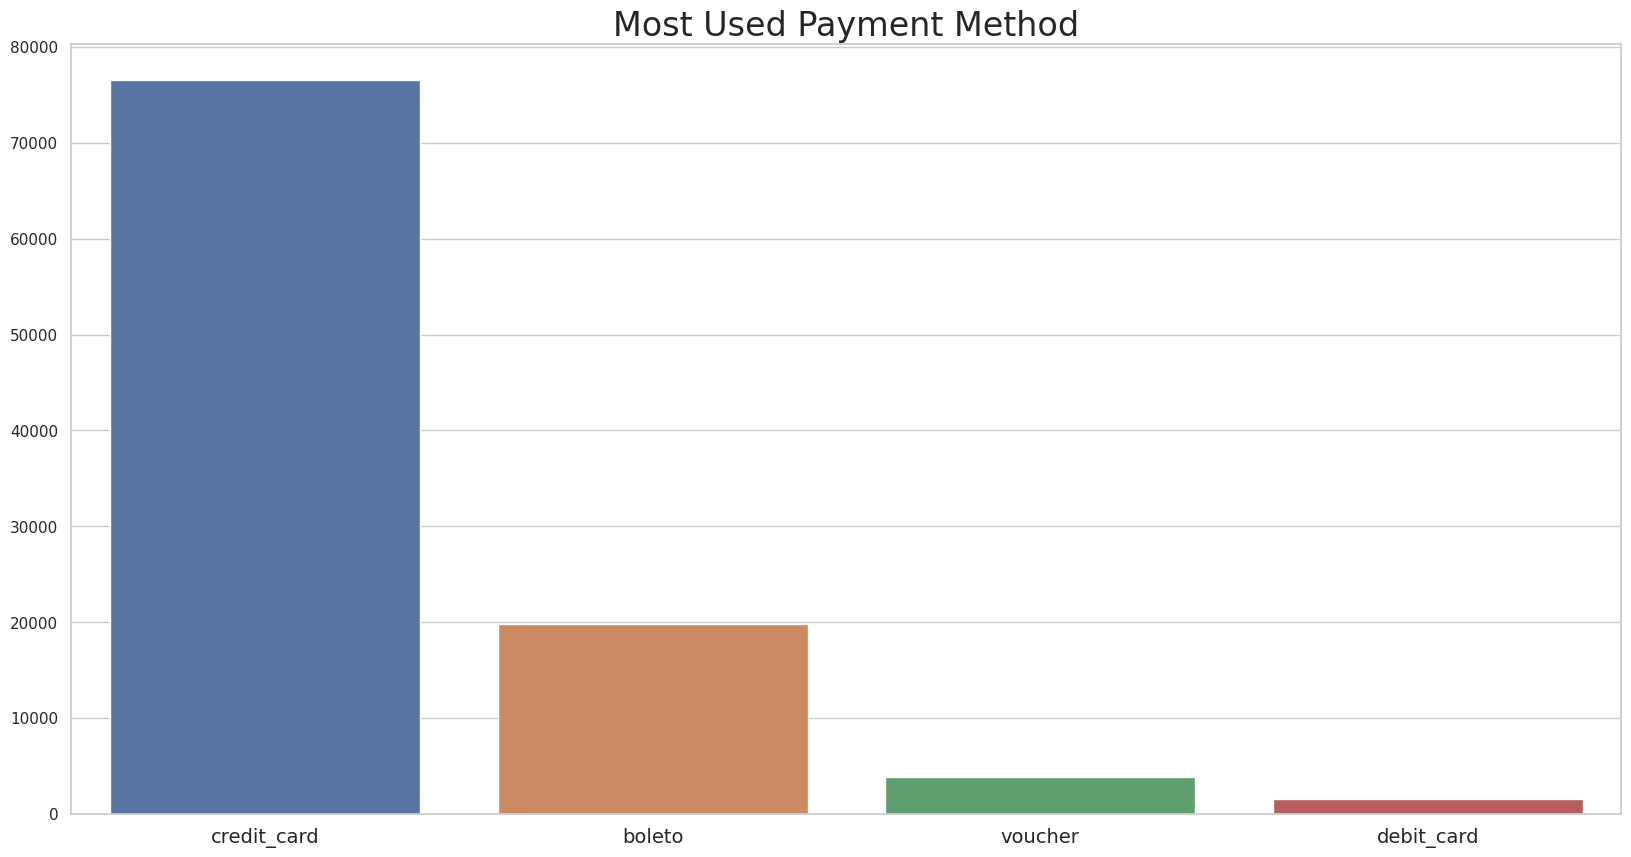

In [ ]:
most_used_payment_method_df = all_df.groupby(by = "payment_type")["order_id"].nunique().reset_index()
most_used_payment_method_df.rename(columns = {
    "order_id": "count"
}, inplace = True)

sns.set(style='whitegrid', rc={"figure.figsize":(20,10)})
sns.barplot(
    x = "payment_type",
    y = "count",
    data = most_used_payment_method_df.sort_values(by = "count", ascending = False),
)
plt.title("Most Used Payment Method", loc="center", fontsize=24)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=14)
plt.show()

### **Pertanyaan 2: Produk Dengan Kategori Apa Yang Paling Banyak Terjual ?**

**Kategori Produk Yang Paling Banyak Terjual**

Berdasarkan visualisasi di bawah. Kategori penjualan yang paling banyak terjual adalah semacam kasur/meja. Lalu, disusul oleh alat kecantikan, peralatan olahraga, aksesoris komputer, dan dekorasi furnitur

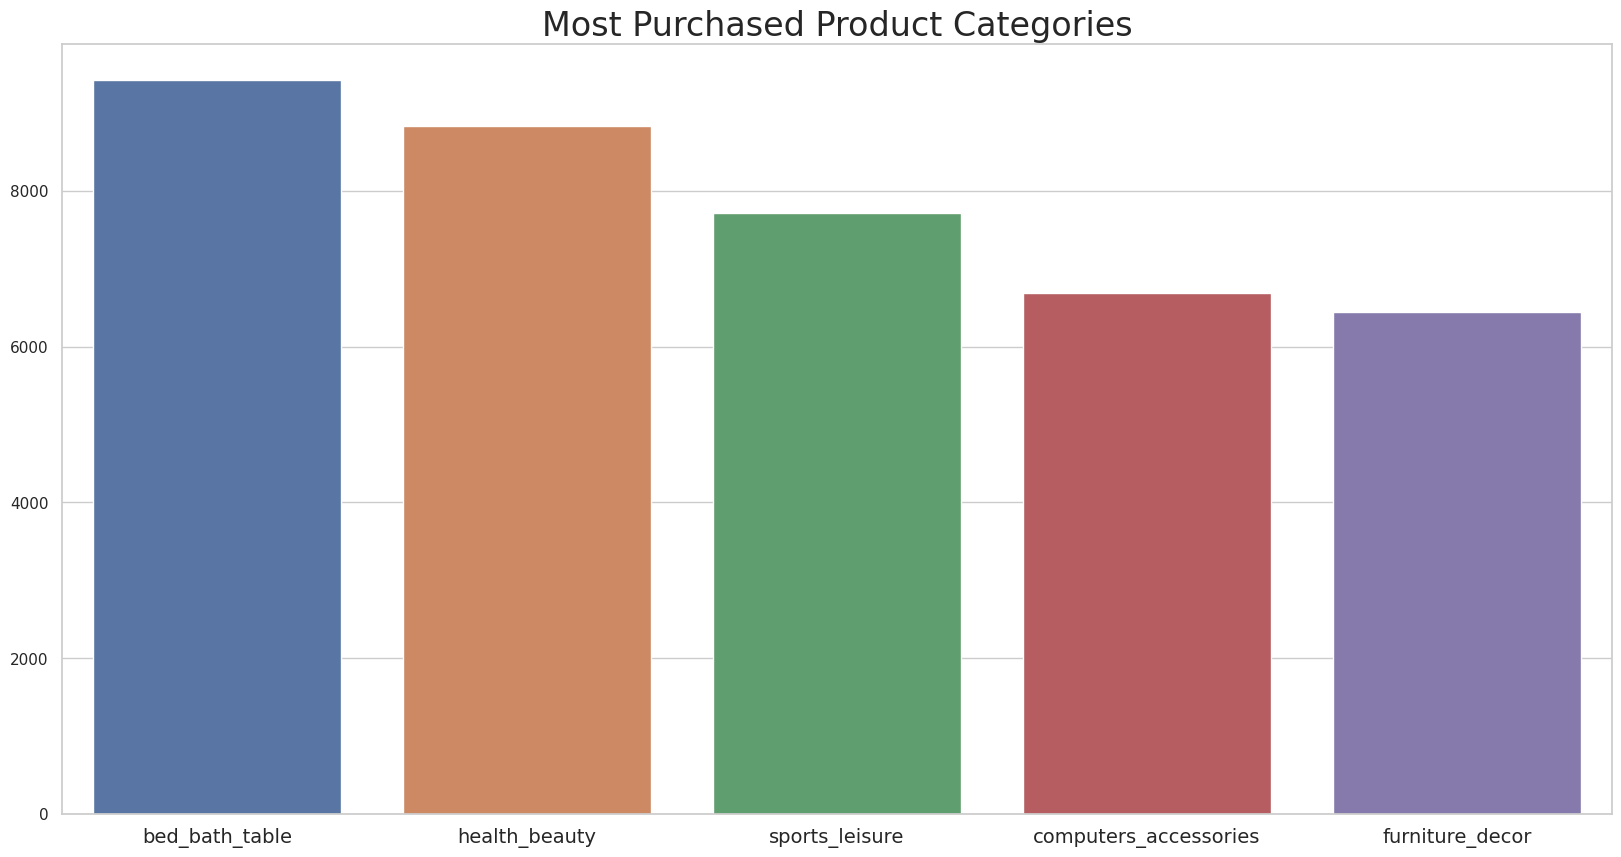

In [ ]:
most_purchased_product_categories_df = all_df.groupby(by = "product_category_name_english")["order_id"].nunique().reset_index()
most_purchased_product_categories_df.rename(columns = {
    "order_id": "order_count"
}, inplace = True)

sns.set(style='whitegrid', rc={"figure.figsize":(20,10)})
sns.barplot(
    x = "product_category_name_english",
    y = "order_count",
    data = most_purchased_product_categories_df.nlargest(5, "order_count"),
)
plt.title("Most Purchased Product Categories", loc="center", fontsize=24)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=14)
plt.show()

### **Pertanyaan 3: Produk Apa Yang Paling Banyak Terjual ?**

**Produk Yang Paling Banyak Terjual**

Berdasarkan visualisasi di bawah. Produk yang paling banyak terjual ialah semacam kasur/meja. Lalu, disusul oleh dekorasi furnitur, peratan berkebun, dan aksesoris komputer

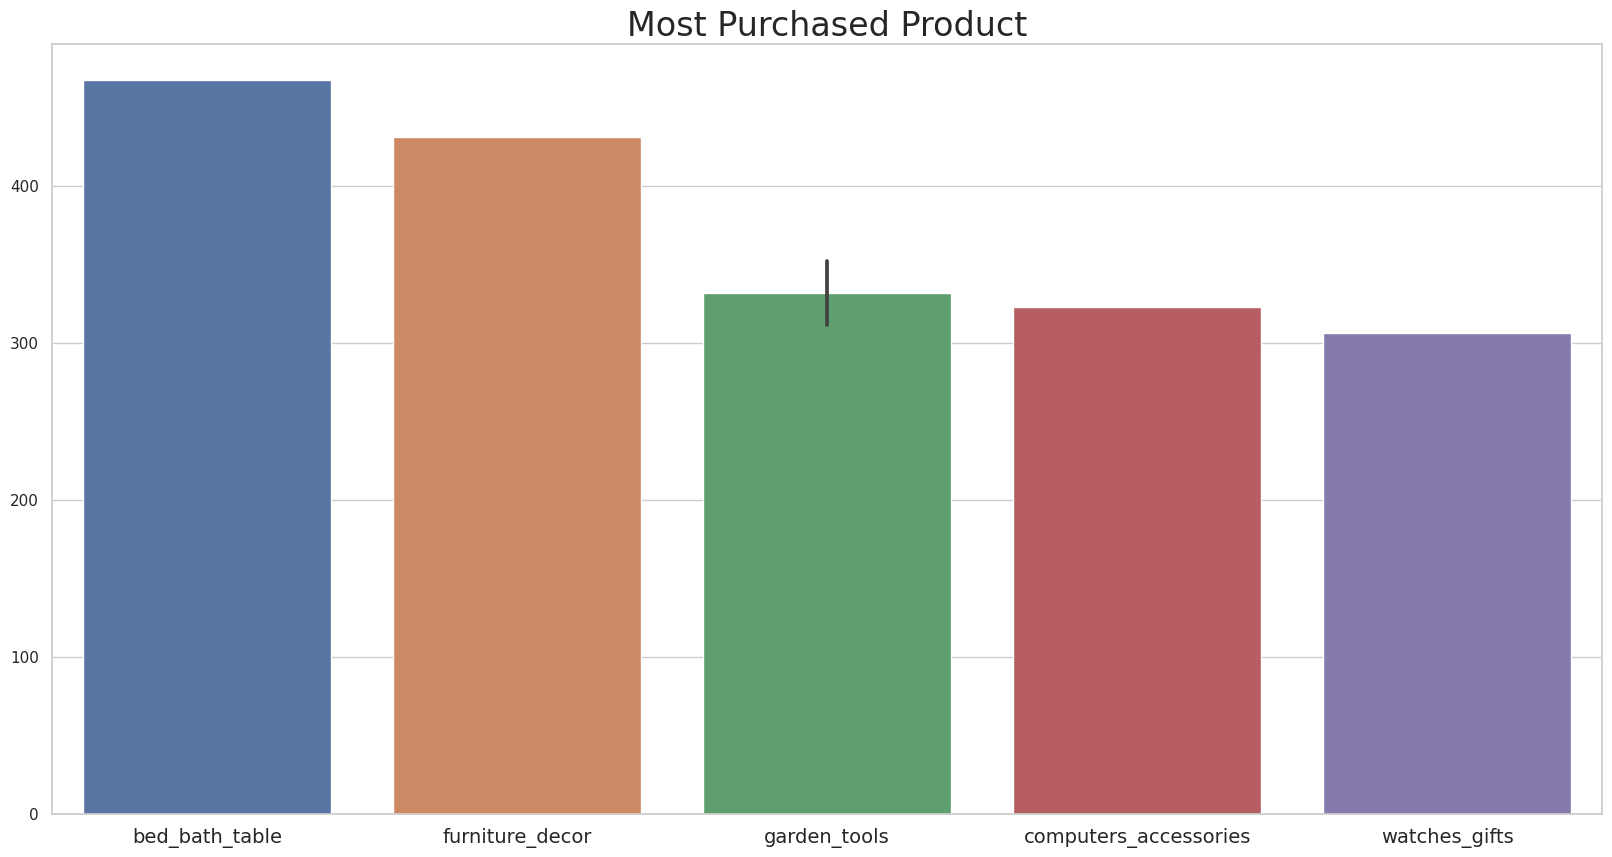

In [ ]:
most_purchased_products_df = all_df.groupby(["product_id","product_category_name_english"])["order_id"].nunique().reset_index()
most_purchased_products_df.rename(columns = {
    "order_id": "order_count"
}, inplace = True)
most_purchased_products_df = most_purchased_products_df.nlargest(6, "order_count")

sns.set(style='whitegrid', rc={"figure.figsize":(20,10)})
sns.barplot(
    x = "product_category_name_english",
    y = "order_count",
    data = most_purchased_products_df,
)
plt.title("Most Purchased Product", loc="center", fontsize=24)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=14)
plt.show()

### **Pertanyaan 4: Kategori Produk Apa Yang Paling Banyak Menghasilkan Keuntungan ? ?**

**Kategori Produk Yang Paling Banyak Menghasilkan Keuntungan**

Berdasarkan visualisasi di bawah. Kategori produk yang paling banyak menghasilkan keuntungan ialah kategori bed_bath_table (semacam kasur/meja/benda di kamar mandi). Lalu, disusul oleh peralatan kecantikan, aksesoris komputer, dekorasi furnitur dan hadiah berupa jam tangan.

Hasil ini sedikit berbeda dengan pertanyaan ke-2 dimana peralatan olahraga merupakan salah satu kategori produk yang paling banyak terjual tetapi tidak terlalu menguntungkan dan juga hadiah jam tangan merupakan salah satu kategori yang menguntungkan walaupun dari segi pembelian cukup sedikit yang membelinya dibandingkan dengan kategori yang lain.

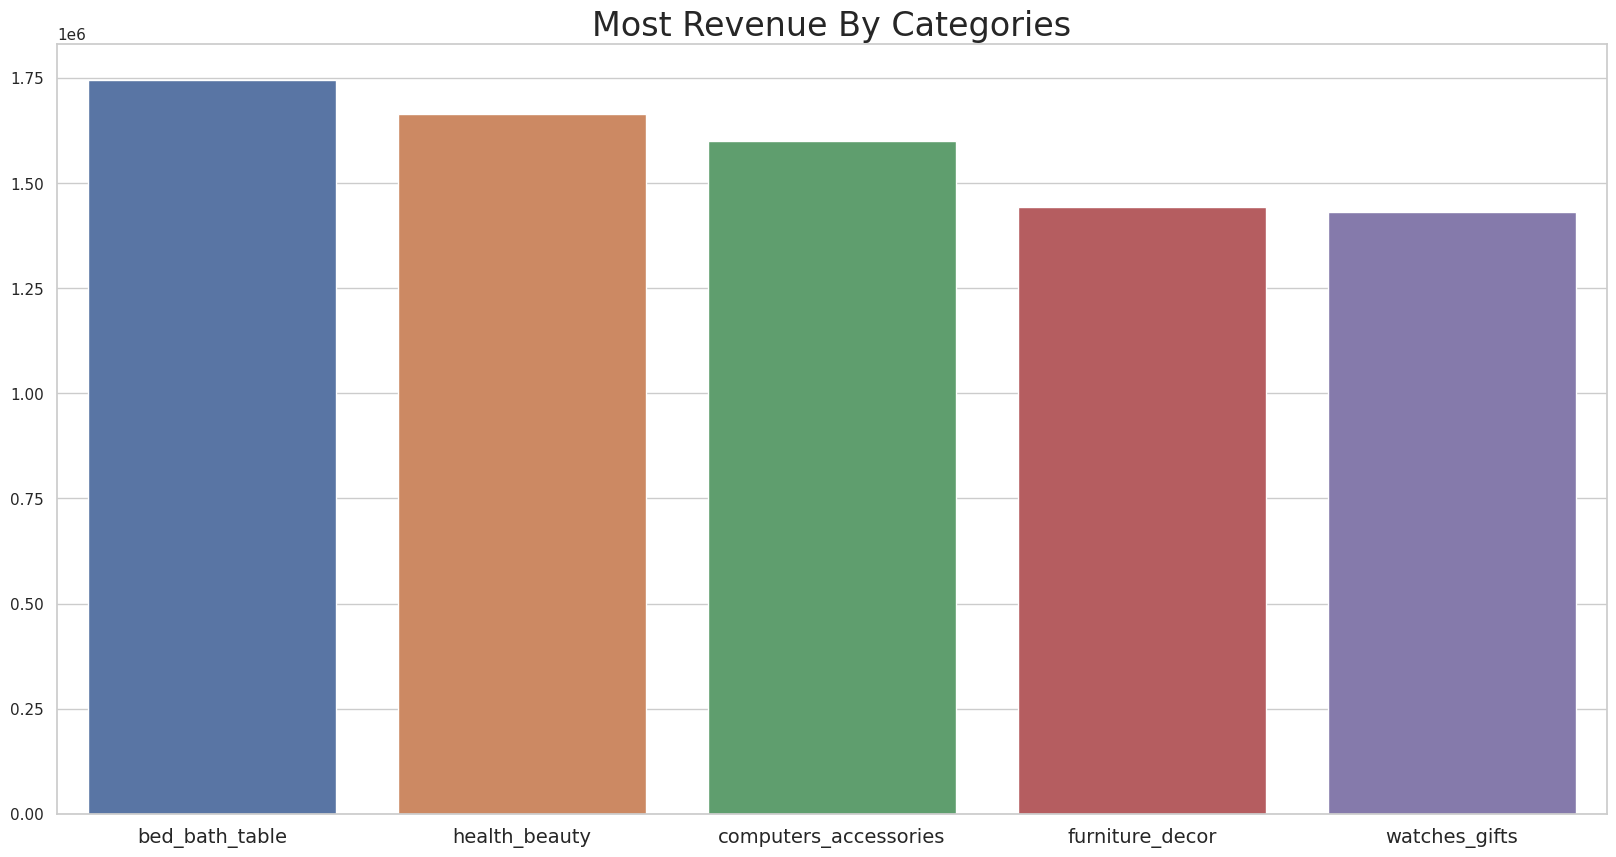

In [ ]:
most_revenue_categories_df = all_df.groupby(by = "product_category_name_english", as_index = False).agg({
    "order_id": "nunique",
    "payment_value": "sum",
})
most_revenue_categories_df.rename(columns = {
    "order_id": "order_count",
    "payment_value": "total_revenue"
}, inplace = True)

sns.set(style='whitegrid', rc={"figure.figsize":(20,10)})
sns.barplot(
    x = "product_category_name_english",
    y = "total_revenue",
    data = most_revenue_categories_df.nlargest(5, "total_revenue"),
)
plt.title("Most Revenue By Categories", loc="center", fontsize=24)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=14)
plt.show()

### **Pertanyaan 5: Bagaimana Grafik Penjualan E-Commerce Tersebut ? Apakah Penjualannya Stabil ?**

Berdasarkan visualisasi di bawah, dapat diketahui bahwa pendapatan meningkat dengan pesat sejak 2016-10. Hingga puncaknya ialah tahun 2017-11, yaitu mendapatkan sekitar 7500 real brasil (asumsi mata uang yang digunakan adalah mata uang negara Brazil). Asumsi penjualan meningkat pada tahun 2017-11 ialah karena ada Black Friday yang menyebabkan beberapa produk diskon sehingga banyak orang yang ingin membeli. Setelah itu penjualan menurun untuk sementara dan kembali menaik.

Grafik line chart menunjukan pendapatan yang cukup stabil, walaupun terdapat sedikit keanehan/kekurangan pada dataset yang diberikan karena penjualan terlihat sedikit pada 2016-09 dan menurun dengan drastis pada 2018-09. Asumsi toko baru dibangun pada tahun 2016-09 dan tutup pada 2018-09. Asumsi lainnya ialah toko hanya memberikan dataset pada tahun tersebut secara terbatas (tidak lengkap) demi menjaga privasi toko.

Jika dataset yang diberikan lengkap, maka seharusnya visualisasi linechartnya stabil dan akan menunjukan pola-pola lainnya seperti uptrend/downtrend. Asumsi yang bisa diberikan hanyalah penjualan akan tetap tinggi pada bulan November di setiap tahunnya (pola musiman) dikarenakan Black Friday yang akan mengarah ke keuntungan yang tinggi bagi toko.

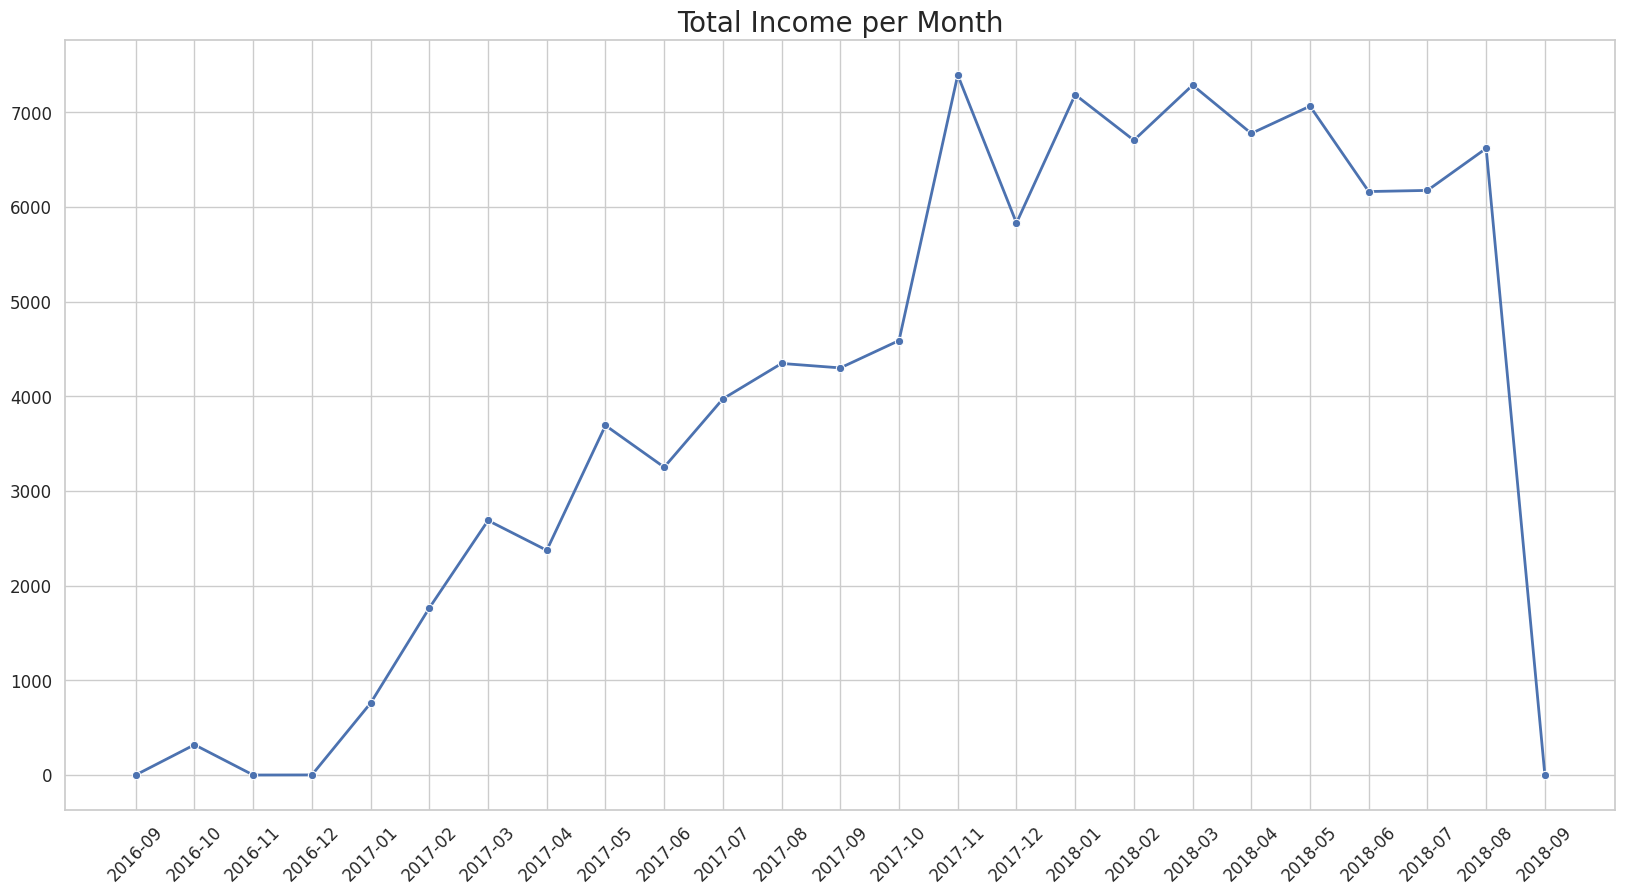

In [ ]:
monthly_orders_df = all_df.resample(rule = "M", on = "order_approved_at").agg({
    "order_id": "nunique",
    "payment_value": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "payment_value": "revenue"
}, inplace=True)

sns.set(style='whitegrid', rc={"figure.figsize":(20, 10)})
sns.lineplot(x="order_approved_at", y="order_count", data=monthly_orders_df, marker='o', linewidth=2)
plt.title("Monthly Orders", loc="center", fontsize=20)
plt.ylabel(None)
plt.xlabel(None)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(rotation=45)
plt.show()

### **Pertanyaan 6: Bagaimana Distribusi Rating Penjualan ? Apakah Banyak Produk Yang Memiliki Rating Rendah ?**

**Distribusi Rating Penjualan**

Berdasarkan visualisasi di bawah ini, dapat diketahui bahwa banyak produk yang memiliki rating di atas 3. Hal ini menunjukan bahwa cukup banyak pengguna yang puas dengan produk di toko tersebut.

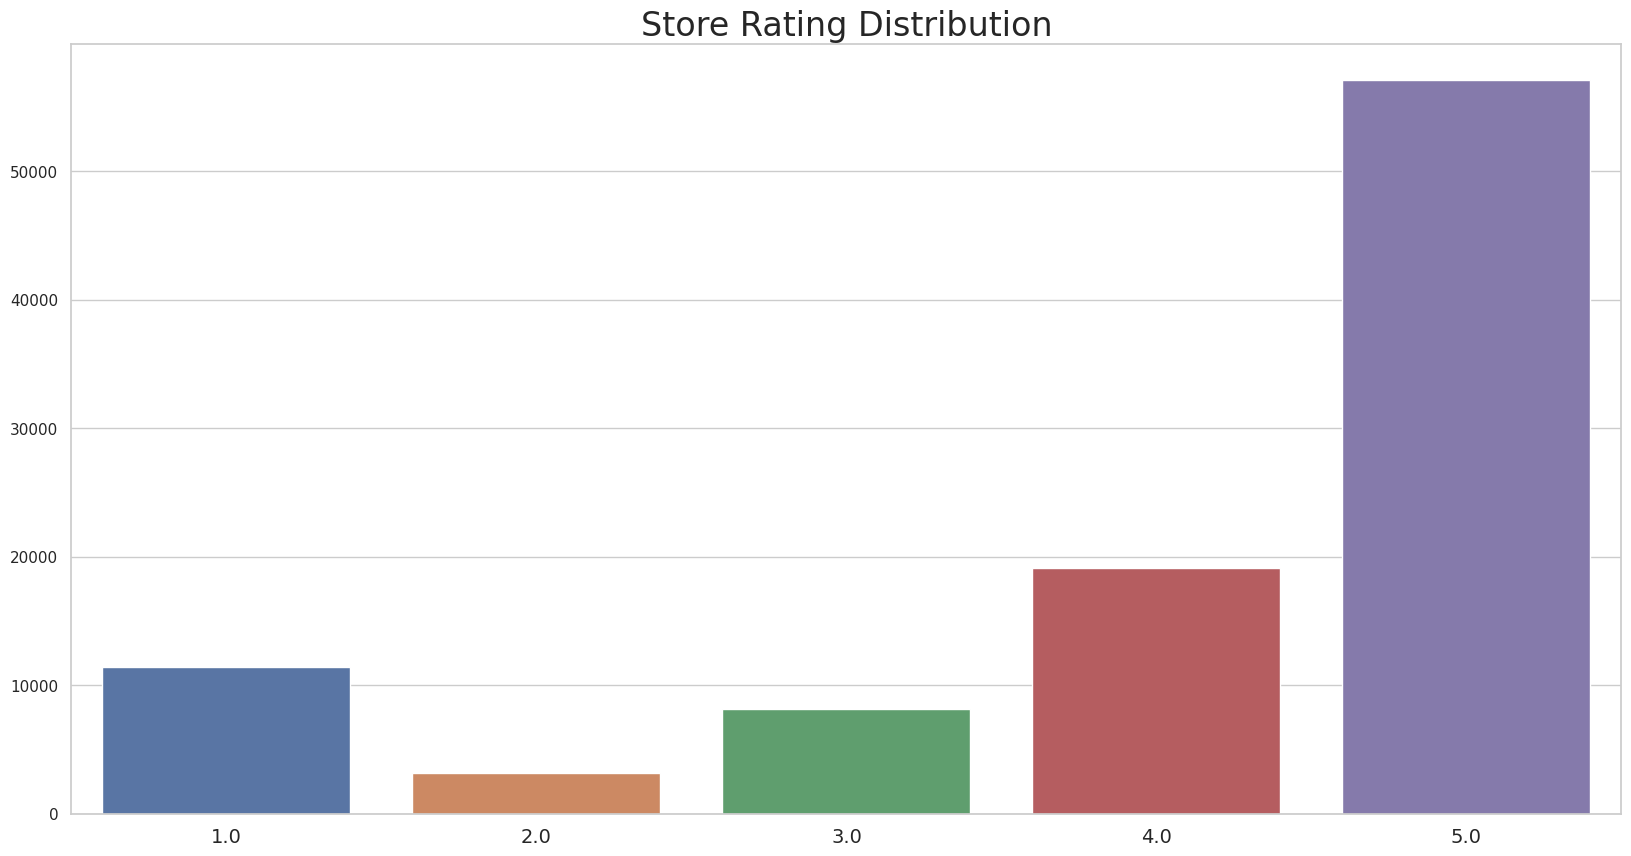

In [ ]:
rating_distribution_df = all_df.groupby(by = "review_score")["order_id"].nunique().reset_index()
rating_distribution_df.rename(columns = {
    "order_id": "rating_count"
}, inplace = True)

sns.set(style='whitegrid', rc={"figure.figsize":(20,10)})
sns.barplot(
    x = "review_score",
    y = "rating_count",
    data = rating_distribution_df,
)
plt.title("Store Rating Distribution", loc="center", fontsize=24)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=14)
plt.show()

**Menampilkan Wordcloud Pada Produk dengan Rating Dibawah 4**

Berdasarkan visualisasi wordcloud di bawah ini. Kita dapat mengetahui apa yang pelanggan katakan terhadap produk yang mereka berikan rating di bawah 4.

Beberapa kata yang diambil ialah:


* Nao recomendo = Saya tidak merekomendasikan
* Entrega incompleta = Pengiriman tidak lengkap
* Nao chegou = Tidak sampai
* Horrivel = Mengerikan
* Produto diferente = Produk yang berbeda
* Parcial entrega = Pengiriman sebagian
* Incompleto = Tidak lengkap
* ruim = Buruk
* defeito = Cacat
* Não gostei = Tidak suka
* Não entregue = Tidak terkirim
* Atraso na = Pengiriman terlambat
* Quebrado = Rusak
* Insatisfeito = Tidak puas
* Cancelamento = Pembatalan
* Produto falsificado = Produk palsu
* Incompleto pedido = Pesanan tidak lengkap
* pessimo pessimo = Buruk sekali
* demora na regular = Keterlambatan regulasi

Para penjual bisa berkaca berdasarkan ringkasan kata seperti ini yang diberikan terhadap produk mereka apabila pembeli menilainya dengan rendah.

Pemegang E-Commerce pun bisa melakukan beberapa hal seperti menindaklanjuti produk yang palsu, memberikan peringatan bagi toko yang mengirimkan produknya sebagian,tidak lengkap, terlambta, dan lain sebagainya karena dikhawatirkan jika dibiarkan akan berdampak ke reputasi serta pendapatan brand E-Commercenya.

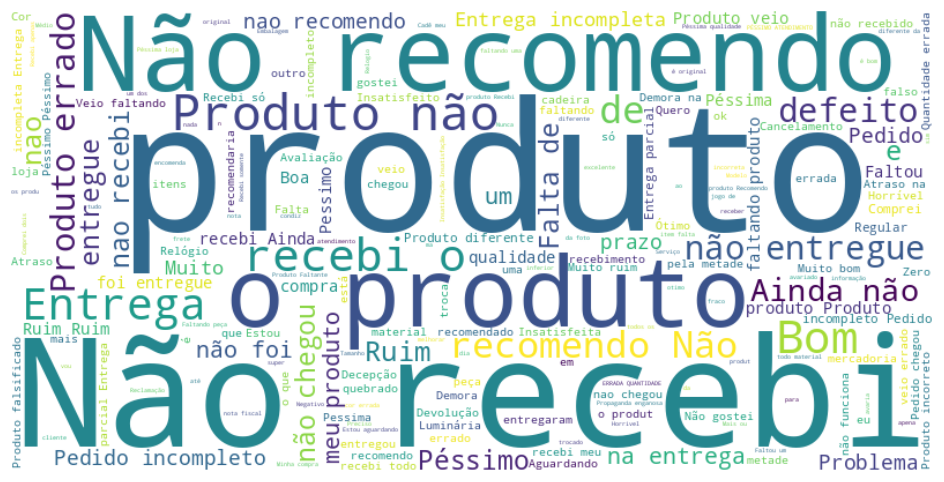

In [ ]:
all_df["score_status"] = all_df["review_score"].apply(lambda x: 1 if x > 3 else -1)

# Filter hanya data dengan review_score == 1 dan review_comment_title adalah string
text = " ".join(all_df[(all_df['score_status'] == -1) & all_df['review_comment_title'].notna()]['review_comment_title'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Menampilkan WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

**Menampilkan Distribusi Rating Pesanan Jika Pengiriman Telat**

Kode di bawah ini mencoba memfilter pesanan yang jumlah waktu pengirimannya lebih lama dari estimasi waktunya atau dalam kata lain kode dibawah ini memfilter pengiriman produk yang telat dan mencoba membuat visualisasinya.

Berdasarkan visualisasi di bawah, dapat diketahui bahwa banyak pembeli yang memberikan rating di bawah 4 (1,2,3) terhadap produk yang telat dan sisanya memberikannya di atas 3 (4,5).

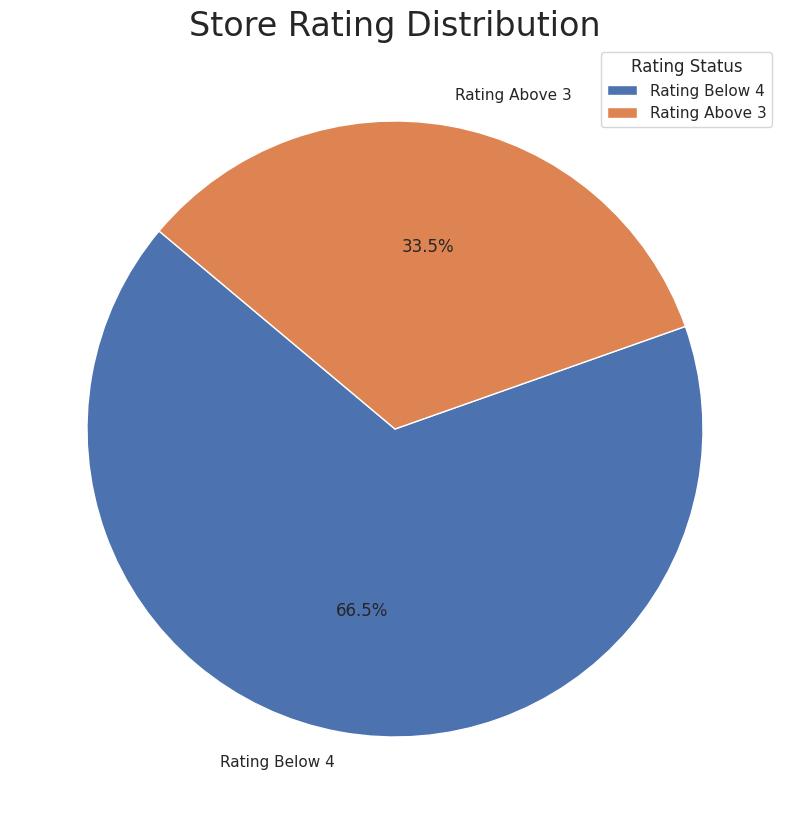

In [ ]:
late_delivery_orders_df = all_df[all_df["order_delivered_customer_date"] > all_df["order_estimated_delivery_date"]]

count_by_status = late_delivery_orders_df['score_status'].value_counts()

plt.pie(count_by_status, labels=["Rating Below 4", "Rating Above 3"], autopct='%1.1f%%', startangle=140)
plt.title("Store Rating Distribution", fontsize=24)
plt.legend(title="Rating Status", labels=['Rating Below 4', 'Rating Above 3'])
plt.show()

### **Pertanyaan 7: Bagaimana Perbandingan Estimasi Waktu Pengiriman Dengan Waktu Pengiriman Sebenarnya ? Apakah Waktu Pengiriman Produk Lebih Lama Daripada Estimasinya ?**

**Perbandingan Estimasi Pengiriman dengan Waktu Pengiriman Sebenarnya**

Berdasarkan visualisasi dibawah ini, dapat diketahui bahwa terdapat sedikit perbedaan waktu antara estimasi dengan waktu pengiriman sebenarnya. Terlihat bahwa di awal-awal pengiriman produk sedikit lebih lama dari estimasinya.

Begitu seterusnya, terkadang produk lebih cepat dikirimkan dari estimasinya ataupun sebaliknya. Hal tersebut terus-menerus terjadi secara tidak konsisten.

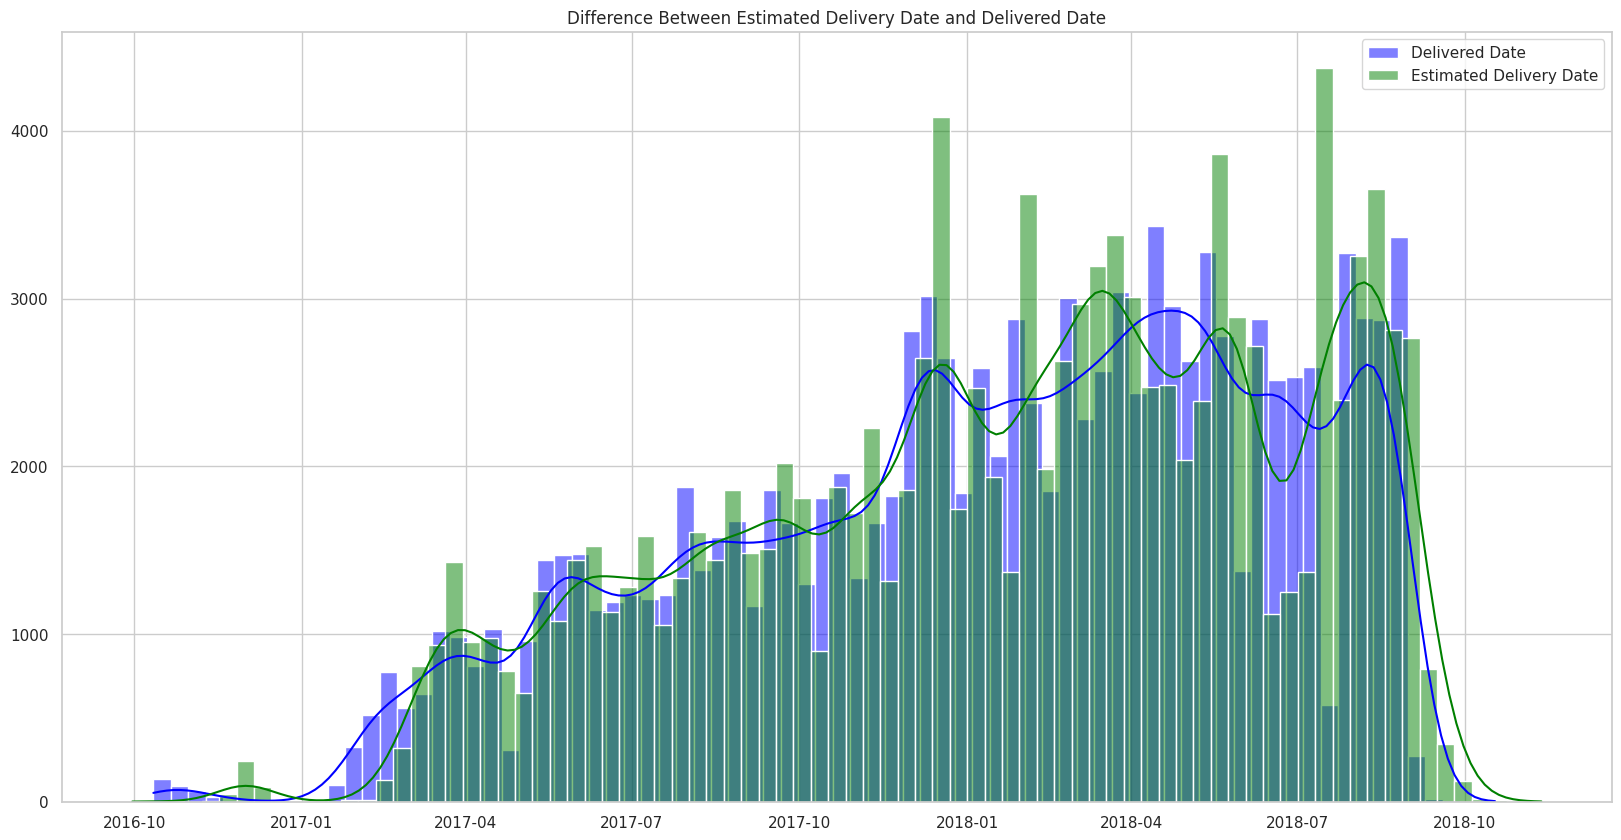

In [ ]:
sns.histplot(all_df['order_delivered_customer_date'], kde=True, color='blue', label='Delivered Date')
sns.histplot(all_df['order_estimated_delivery_date'], kde=True, color='green', label='Estimated Delivery Date')

plt.title("Difference Between Estimated Delivery Date and Delivered Date")
plt.legend()
plt.ylabel(None)
plt.xlabel(None)
plt.show()

### **Pertanyaan 8: Apa penyebab Pengiriman Produk Datang Terlambat ?**

Berdasarkan visualisasi di bawah ini, sepertinya salah satu penyebab pengiriman produk datang terlambat ialah karena pengirimannya yang jauh. Terlihat cukup banyak daerah bagian timur dan selatan mengalami keterlambatan pengiriman.

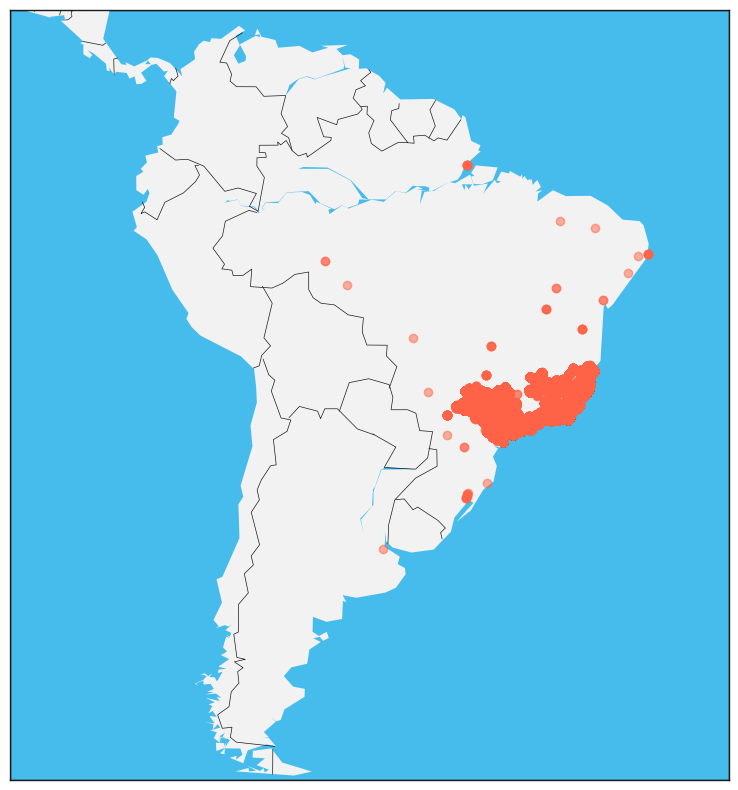

In [ ]:
late_delivery_customers_geolocation_df = pd.merge(
    left = late_delivery_orders_df,
    right = customers_geolocation_df,
    how = "inner",
    left_on = "customer_id",
    right_on = "customer_id"
)
late_delivery_customers_geolocation_df = late_delivery_customers_geolocation_df[["geolocation_lat","geolocation_lng"]]

lat = late_delivery_customers_geolocation_df['geolocation_lat']
lon = late_delivery_customers_geolocation_df['geolocation_lng']

plt.figure(figsize=(10,10))

# Membuat peta geografis dengan modul Basemap dengan daerah koordinat negara Brazil
m = Basemap(llcrnrlat=-55.401805,llcrnrlon=-92.269176,urcrnrlat=13.884615,urcrnrlon=-27.581676)
m.bluemarble()
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.drawcountries()
m.scatter(lon, lat,zorder=10,alpha=0.5,color='tomato')

### **Pertanyaan 9: Bagaimana Demografi Pelanggan dan Penjual ?**

**Menampilkan Demografi Pelanggan**

Berdasarkan kode dibawah ini, dapat diketahui bahwa banyak pelanggan pada e-commerce tersebut yang berasal dari kota sao paulo, rio de janeiro, belo horizonte, brasilia, dan curitiba.

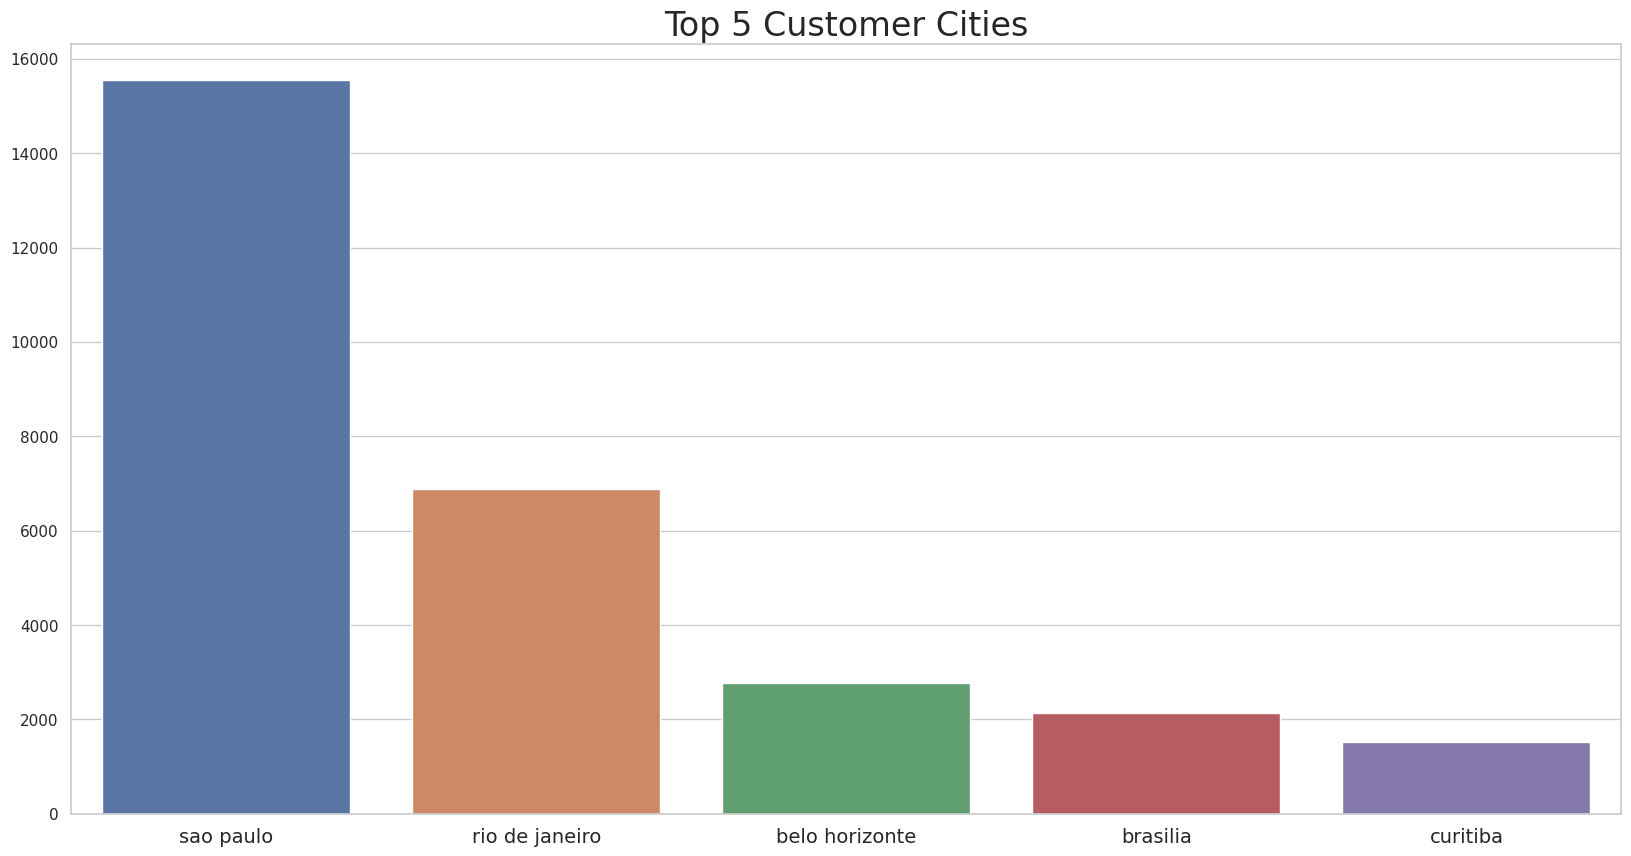

In [ ]:
top_5_customer_cities_df = customers_df.groupby(by = "customer_city")["customer_id"].nunique().sort_values(ascending = False).nlargest(5).reset_index()
top_5_customer_cities_df.rename(columns = {
    "customer_id": "count"
}, inplace = True)

sns.set(style='whitegrid', rc={"figure.figsize":(20,10)})
sns.barplot(
    x = "customer_city",
    y = "count",
    data = top_5_customer_cities_df.sort_values(by = "count", ascending = False),
)
plt.title("Top 5 Customer Cities", loc="center", fontsize=24)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=14)
plt.show()

**Menampilkan Demografi Penjual**

Berdasarkan kode dibawah ini, dapat diketahui bahwa banyak penjual pada e-commerce tersebut yang berasal dari kota sao paulo, curitiba, rio de janeiro, belo horizonte dan ribeirao prato

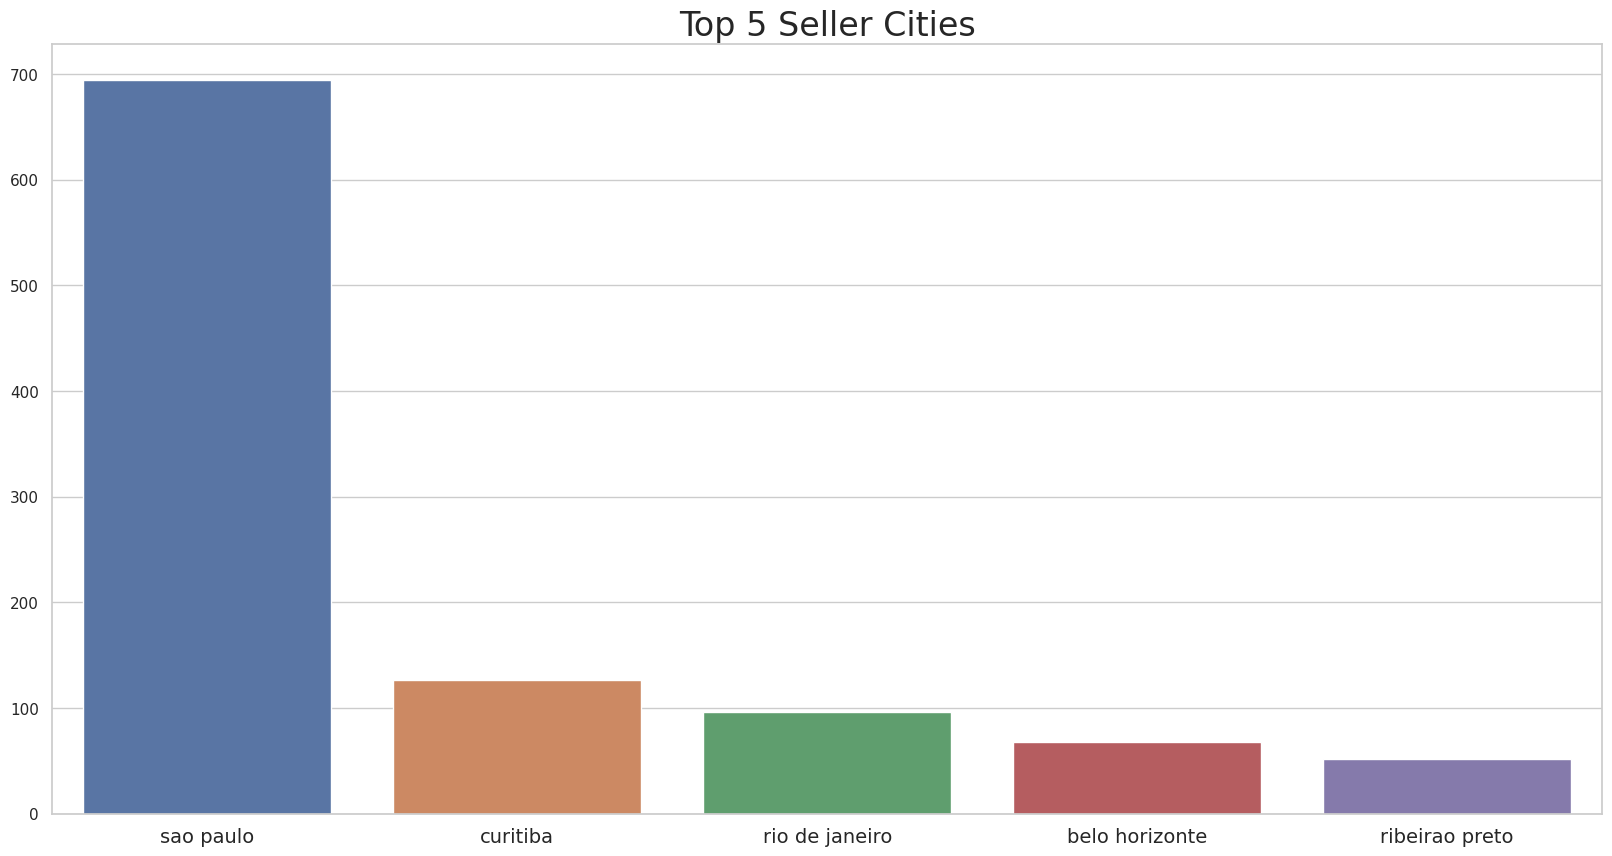

In [ ]:
top_5_seller_cities_df = sellers_df.groupby(by = "seller_city")["seller_id"].nunique().sort_values(ascending = False).nlargest(5).reset_index()
top_5_seller_cities_df.rename(columns = {
    "seller_id": "count"
}, inplace = True)

sns.set(style='whitegrid', rc={"figure.figsize":(20,10)})
sns.barplot(
    x = "seller_city",
    y = "count",
    data = top_5_seller_cities_df.sort_values(by = "count", ascending = False),
)
plt.title("Top 5 Seller Cities", loc="center", fontsize=24)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=14)
plt.show()

### **Pertanyaan 10: Pada Waktu Apa Penjualan Paling Banyak Terjadi (Hari/Jam)**

**Waktu Penjualan yang Paling Banyak Terjadi (Hari)**

Berdasarkan visualisasi di bawah, dapat diketahui bahwa penjualan yang paling banyak terjadi ialah pada hari Senin dan terus menurun hingga hari Sabtu dan sedikit menaik kembali pada hari Minggunya.

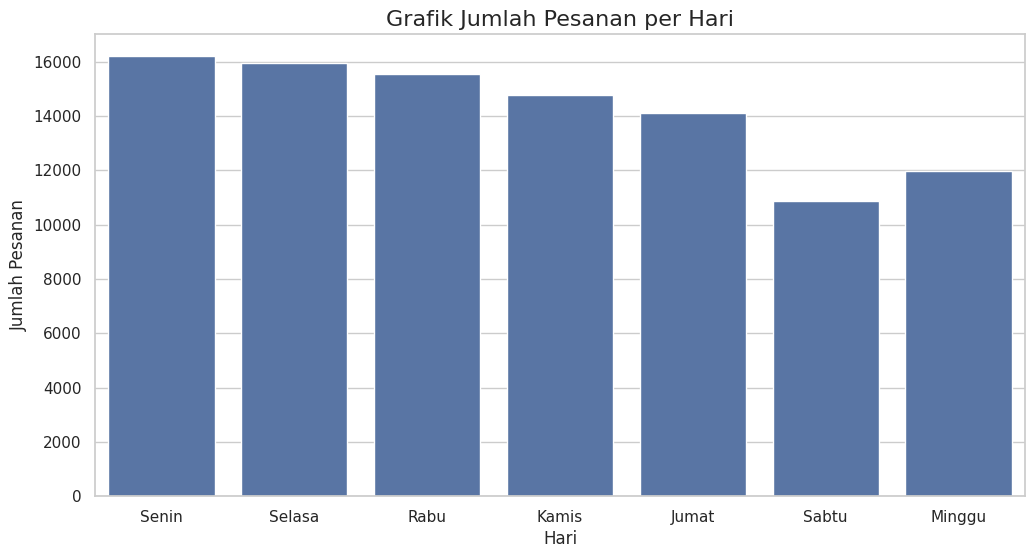

In [ ]:
daily_sales = all_df.groupby(all_df['order_purchase_timestamp'].dt.dayofweek)['order_id'].nunique()

# Membuat dictionary untuk mengonversi indeks (0-6) ke hari (Senin-Minggu)
day_mapping = {0: 'Senin', 1: 'Selasa', 2: 'Rabu', 3: 'Kamis', 4: 'Jumat', 5: 'Sabtu', 6: 'Minggu'}

# Mengonversi indeks menjadi nama hari
daily_sales.index = daily_sales.index.map(day_mapping)

# Mereset indeks DataFrame
daily_sales = daily_sales.reset_index()

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='order_purchase_timestamp', y='order_id', data=daily_sales, color='b')

plt.title('Grafik Jumlah Pesanan per Hari', fontsize=16)
plt.xlabel('Hari', fontsize=12)
plt.ylabel('Jumlah Pesanan', fontsize=12)
plt.show()

**Waktu Penjualan yang Paling Banyak Terjadi (Jam)**

Berdasarkan visualisasi di bawah ini, dapat diketahui bahwa pesanan mulai meningkat pada jam 6 pagi dan puncaknya di jam 11 siang dan cukup stabil hingga jam 10 malam.

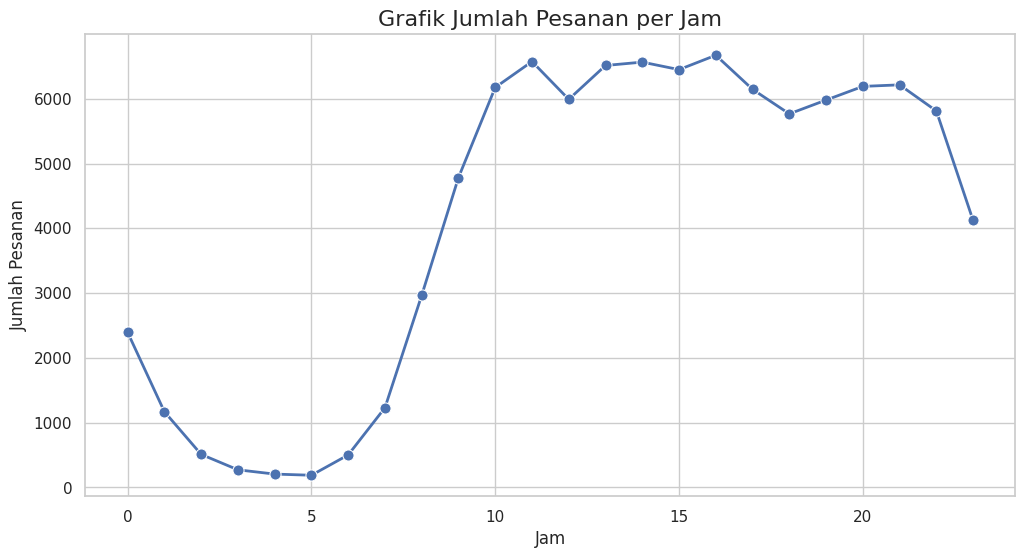

In [ ]:
hourly_sales = all_df.groupby(all_df['order_purchase_timestamp'].dt.hour)['order_id'].nunique()

hourly_sales_df = pd.DataFrame({'Jam': hourly_sales.index, 'Jumlah Pesanan': hourly_sales.values})

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x='Jam', y='Jumlah Pesanan', data=hourly_sales_df, marker='o', markersize=8, color='b', linewidth=2)
plt.title('Grafik Jumlah Pesanan per Jam', fontsize=16)
plt.xlabel('Jam', fontsize=12)
plt.ylabel('Jumlah Pesanan', fontsize=12)
plt.show()

### **Pertanyaan 11: Bagaimana Segmentasi Pelanggan Berdasarkan RFM ?**

**Apa Itu Segmentasi Pelanggan Berdasarkan RFM ?**

Segmentasi pelanggan berdasarkan RFM adalah sebuah metode analisis yang digunakan oleh bisnis untuk membagi basis pelanggan mereka menjadi segmen-segmen yang lebih kecil berdasarkan tiga faktor utama: Recency (R), Frequency (F), dan Monetary Value (M).

Dengan memadukan ketiga faktor ini, perusahaan dapat membuat matriks atau sistem penilaian yang memungkinkan mereka untuk mengelompokkan pelanggan ke dalam segmen-segmen berdasarkan nilai-nilai RFM. Hasilnya mungkin terdiri dari segmen pelanggan seperti:

* Champions: Pelanggan dengan nilai R, F, dan M tinggi. Mereka adalah pelanggan yang berinteraksi secara teratur, baru-baru ini, dan menghabiskan banyak uang.

* Loyal Customers: Pelanggan dengan nilai F dan M tinggi, meskipun nilai R mereka mungkin sedikit lebih rendah. Mereka sering berbelanja dan menghabiskan banyak uang.

* Potential Loyalists: Pelanggan dengan nilai R yang baik, tetapi F dan M yang lebih rendah. Mereka baru-baru ini berinteraksi dan mungkin dapat menjadi pelanggan setia jika didorong dengan tawaran yang sesuai.

Segmentasi pelanggan berdasarkan RFM membantu perusahaan dalam berbagai aspek, termasuk penargetan pemasaran, personalisasi, retensi pelanggan, dan analisis bisnis. Dengan memahami karakteristik pelanggan dalam segmen-segmen ini, perusahaan dapat mengembangkan strategi yang lebih efektif untuk melayani dan mempertahankan pelanggan mereka.

In [ ]:
max_date = all_df["order_purchase_timestamp"].max()

rfm_df = all_df.groupby('customer_id').agg({
    'order_purchase_timestamp': lambda x: (max_date - x.max()).days,
    'order_id':'count',
    'payment_value':'sum'
}).reset_index()

rfm_df.columns =['customer_id','recency','frequency','monetary']

#memberikan peringkat pada kolom frequency
rfm_df['frequency'] = rfm_df['frequency'].rank(method='first', ascending=False)

**Membuat RFM Score**

In [ ]:
# Setiap kuartil dibagi menjadi 5 kelompok dengan penanda atau label yang sesuai.
# Selanjutnya, kuartil-kuartil ini digunakan untuk membuat nilai RFM_Score, yang akan digunakan untuk segmentasi pelanggan.

rfm_df['r_quartile'] = pd.qcut(rfm_df['recency'], 5, ['5','4','3','2','1'])
rfm_df['f_quartile'] = pd.qcut(rfm_df['frequency'], 5, labels=['1', '2', '3', '4', '5'], duplicates='drop')
rfm_df['m_quartile'] = pd.qcut(rfm_df['monetary'], 5, ['1','2','3','4','5'])
rfm_df["RFM_Score"] = rfm_df["r_quartile"].astype(int) + rfm_df["f_quartile"].astype(int) + rfm_df["m_quartile"].astype(int)

**Membuat Segmentasi Pelanggan**

In [ ]:
# Membuat daftar segmentasi
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Lose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

rfm_df['segment'] = rfm_df['r_quartile'].astype(str) + rfm_df['f_quartile'].astype(str)
rfm_df['segment'] = rfm_df['segment'].replace(seg_map, regex=True)

# Filter data berdasarkan nilai segmen yang diinginkan
desired_segments = ['Loyal Customers', 'Promising', 'Potential Loyalists', 'Champions', 'Kecanduan']
rfm_df = rfm_df[rfm_df['segment'].isin(desired_segments)]

rfm_df

,customer_id,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Score,segment
4,000379cdec625522490c315e70c7a9fb,198,12808.0,107.01,4,1,3,8,Promising
6,000419c5494106c306a97b5635748086,228,12810.0,49.40,4,1,1,6,Promising
18,000fd45d6fedae68fc6676036610f879,185,12819.0,66.81,4,1,2,7,Promising
20,001028b78fd413e19704b3867c369d3a,188,12821.0,37.61,4,1,1,6,Promising
25,0012a5c13793cf51e253f096a7e740dd,226,12825.0,369.92,4,1,5,10,Promising
...,...,...,...,...,...,...,...,...,...
99419,fffb97495f78be80e2759335275df2aa,274,99422.0,61.01,3,5,2,10,Loyal Customers
99421,fffcb937e9dd47a13f05ecb8290f4d3e,214,99424.0,91.91,4,5,3,12,Loyal Customers
99422,fffecc9f79fd8c764f843e9951b11341,202,3061.0,81.36,4,1,2,7,Promising
99423,fffeda5b6d849fbd39689bb92087f431,148,99425.0,63.13,4,5,2,11,Loyal Customers


**Menampilkan Distribusi Pelanggan Berdasarkan Segmentasinya**

Berdasarkan visualisasi di bawah ini, dapat diketahui bahwa masih cukup banyak pelanggan yang segmennya potential loyalist, yaitu sebanyak 36.58% dan promising sebanyak 9.04%. Pelanggan-pelanggan tersebut merupakan pelanggan yang pernah melakukan transaksi sekali atau dua kali dan belum lama pernah melakukan transaksi.

Kedua segmen tersebut tidak sebagus loyal customer dan champions yang suka bertransaksi hampir setiap hari dan berkali-kali.

Pihak toko pun bisa memberikan beberapa hal agar memikat hati pelanggannya seperti memberikan promo, mempercepat pengiriman, memperbagus kualitas produknya dan lain sebagainya.

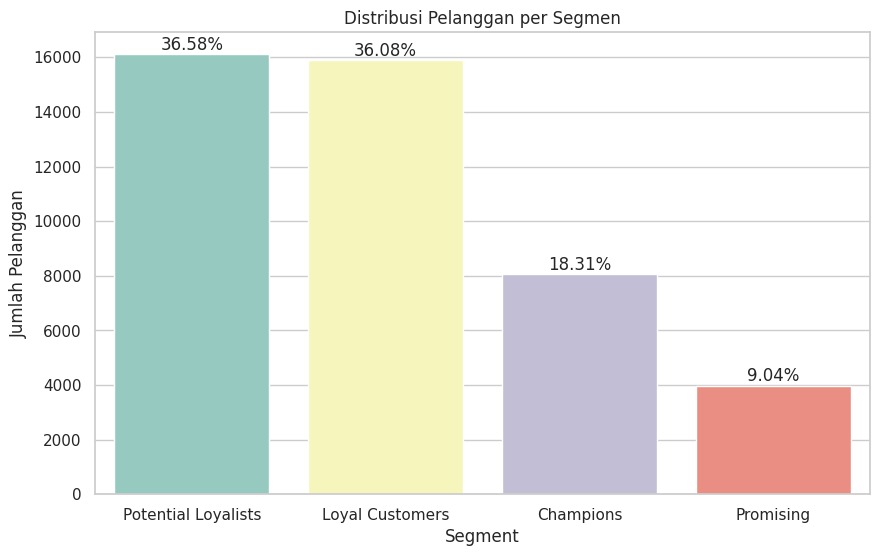

In [ ]:
# Hitung jumlah observasi per segmen
segment_counts = rfm_df['segment'].value_counts()

# Hitung persentase
segment_percentages = (segment_counts / segment_counts.sum()) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=segment_counts.index, y=segment_counts, palette="Set3")
plt.xlabel('Segment')
plt.ylabel('Jumlah Pelanggan')
plt.title('Distribusi Pelanggan per Segmen')

# Menambahkan persentase di atas setiap bar
for i in range(len(segment_counts)):
    plt.text(i, segment_counts[i] + 5, f"{segment_percentages[i]:.2f}%", ha='center', va='bottom')

plt.show()

## **Conclusion**

- Kesimpulan pertanyaan ke-1: Metode pembayaran yang paling banyak digunakan ialah kartu kredit dan boleto.
- Kesimpulan pertanyaan ke-2: Kategori penjualan yang paling banyak terjual adalah semacam kasur/meja/benda di kamar mandi
- Kesimpulan pertanyaan ke-3: Produk yang paling banyak terjual adalah ialah semacam kasur/meja/benda di kamarmandi
- Kesimpulan pertanyaan ke-4: Kategori produk yang paling banyak menghasilkan keuntungan ialah kategori bed_bath_table (semacam kasur/meja/benda di kamar mandi). Sedikit berbeda dengan pertanyaan ke-2 dimana peralatan olahraga merupakan salah satu kategori produk yang paling banyak terjual tetapi tidak terlalu menguntungkan dan juga hadiah jam tangan merupakan salah satu kategori yang menguntungkan walaupun dari segi pembeliannya cukup sedikit
- Kesimpulan pertanyaan ke-5: Mendapatkan sekitar 7500 real brazil (asumsi mata uang yang digunakan adalah mata uang negara Brazil). Asumsi penjualan meningkat pada tahun 2017-11 ialah karena ada Black Friday yang menyebabkan beberapa produk diskon sehingga banyak orang yang ingin membeli. Lalu, grafik line chart menunjukan pendapatan yang cukup stabil, walaupun terdapat sedikit keanehan/kekurangan pada dataset yang diberikan (tiba-tiba menurun drastis diakhir)
- Kesimpulan pertanyaan ke-6: Banyak produk yang memiliki rating di atas 3. Hal ini menunjukan bahwa cukup banyak pengguna yang puas dengan produk di toko tersebut.
- Kesimpulan pertanyaan ke-7: Terdapat sedikit perbedaan waktu antara estimasi dengan waktu pengiriman sebenarnya. Terlihat bahwa di awal-awal pengiriman produk sedikit lebih lama dari estimasinya. Begitu seterusnya, terkadang produk lebih cepat dikirimkan dari estimasinya ataupun sebaliknya. Hal tersebut terus-menerus terjadi secara tidak konsisten. Sepertinya banyak produk yang pengirimannya melebihi estimasi
- Kesimpulan pertanyaan ke-8: Penyebab pengiriman produk datang terlambat ialah karena pengirimannya yang jauh. Terlihat cukup banyak daerah bagian timur dan selatan mengalami keterlambatan pengiriman.
- Kesimpulan pertanyaan ke-9: Banyak pelanggan pada e-commerce tersebut yang berasal dari kota sao paulo, rio de janeiro, belo horizonte, brasilia, dan curitiba. Sedangkan dapat diketahui bahwa banyak penjual pada e-commerce tersebut yang berasal dari kota sao paulo, curitiba, rio de janeiro, belo horizonte dan ribeirao prato
- Kesimpulan pertanyaan ke-10: Penjualan yang paling banyak terjadi ialah pada hari Senin (terbanyak) dan terus menurun hingga hari Sabtu dan sedikit menaik kembali pada hari Minggunya. Sedangkan waktu pesanan mulai meningkat pada jam 6 pagi dan puncaknya di jam 11 siang (terbanyak) dan cukup stabil hingga jam 10 malam.
- Kesimpulan pertanyaan ke-11: Masih cukup banyak pelanggan yang segmennya potential loyalist yaitu sebanyak 36.58% dan promising sebanyak 9.04%. Pelanggan-pelanggan tersebut merupakan pelanggan yang pernah melakukan transaksi sekali atau dua kali dan belum lama pernah melakukan transaksi. Pihak toko harus bisa mempertahankan pelanggan dengan segmen loyal customers dan champions karena suka bertransaksi, serta harus bisa merubah pelanggan yang segmennya potential loyalist dan promising menjadi segmen loyal customers dan champions

**Exporting The Dataset**

In [ ]:
# all_df.to_csv("all_data.csv", index=False)
# late_delivery_customers_geolocation_df.to_csv("late_delivery_geo.csv", index=False)